# **Malaria Detection**

# Executive summary
*What are the most important findings from the analysis done in Milestone - Provide the final proposed model specifications*

###Proposed model:
The proposed convolution neural network model takes the blood smear images and accurately classify them into parasitized, or unifected. This solution will make malaria detection efficient, accurate and scalable.

###Model performance:
This model has high accuracy (98% train/validation/test accuracy). Also, the model only misclassified 8 malaria cases, and accurately predicted the rest of the positive cases, driving a recall of 0.99. The model has generalized well to the variances in the training data, since the training and validation accuracies have converged to 98%. Finally, there are 4 convolution layers and 557K parameters to train, which the model was able to learn in 8 epochs.

###Model specifications:
- The proposed model has 4 layers of convolution because with more layers, the model can learn beyond edge detection, such as detecting parts, objects  and scenes, which are important because a parasitized image can have varying degree of information, such as what species of parasite is present, what is the life cycle stage of the infection, and what changes have occurred to RBC’s shape, size and structure.

- LeakyRelu activation function with a negative slope of 0.1 allows some negative info to flow through the model, i.e. it doesn't make the neuron dead (like in ReLU), and so it can learn complex relationships in the data.

- Maxpooling capture the dominant features in the image, such as edges.

- Batch normalization helped the model to learn fast, while drop out of 50% helped in reducing overfitting.



# Problem and Solution Summary
*Summary of the problem - Explain the reason for the proposed solution design - How it would affect the problem/business?*

###Problem summary:
Malaria is a global health concern even today. In 2019, there were 229 M cases and 400K deaths from Malaria. Kids under 5 are particularly more vulnerable and made up 67% of death. Detecting malaria is done by microscopic analysis of the blood smear image, which is a time consuming, tedious and more importantly highly dependent on the skill and expertise of the lab technician analyzing the images on the microscope. However, if we are able to detect malaria early, it will significantly improve the morbidity and mortality rates.

###Solution summary:
My recommendation is to develop a Convolution Neural Network model that will take the blood smear images and accurately classify if it as parasitized (infected by malaria), or unifected (healthy). This will make malaria detection efficient, accurate and scalable.


#Recommendations for implementation
*What are some key recommendations to implement the solutions? - What are the key actionables for stakeholders? What is the expected benefit and/or costs? - What are the key risks and challenges? - What further analysis needs to be done or what other associated problems need to be solved?*

###Implementation -

 Depending on how the model is deployed – either on cell phone or the web, the model will need to be converted to Tensoflow lite for cell phone app, or ONNX for web, followed by building an API and then integrating it in the desired environment

###Risk and challenges -

  - Training a CNN is extremely expensive and requires dedicated computation power in terms of GPUs.
  
  - Model drift - Malaria parasite is ever evolving and so is the lab practices, which would impact the quality of the blood smear images. So, the model needs to be maintained and updated to avoid model drift. However, getting new data can be very expensive
  
  - Finally accessibility – If we can get this technology deployed where healthcare professionals are constrained, it will significantly benefit the public at large


###Further analyis -

   - Recommend training the models with much larger dataset that captures diversity in geographic regions, patient demographics, malaria species,there by improving generalization and reducing bias. It will also help in choosing a better model, since the performance metrices of many of the models developed below are very comparable.
   - Also, since CNN models are extremely difficult to interpret, I would recommend that we extract what features are being learned by the neurons, and how they influence the classification. Gaining visibility to these details will enhance trust and adoption of the technology






##<b>Problem Definition</b>
**The context:** Why is this problem important to solve?<br>

**The objectives:** What is the intended goal?<br>

**The key questions:** What are the key questions that need to be answered?<br>

**The problem formulation:** What is it that we are trying to solve using data science?

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>




##<b>Summary</b>
>*Malaria is a global health conern with over 50% of world's population being at risk of infection. Children under 5yrs of age are the most vulnerable as they made up 67% of all malaria death worldwide in 2019. Fortunately, early detection can dramatically improve the positive outcome.*

>*Having said that, traditional diagnosis methods are tedious, time consuming, and more importantly the accuracy is highly dependant on the lab technician's expertise*

>*The key objective of this project is to develop an convoluded neural network (CNN) model that will take the image of a RBC (Red Blood Cell), analyze it, and accurately classify between infected (aka parasitized) and uninfected cells. This will immensely improve early detection of malaria, and could be the key to saving millions of lives.*

>*A series of CNN models were constructed, hyperparameters were optimized, models were trained and tested in order to develop the most accurate model.*

>*These models were trained on 25K images of parasitized and uninfected cells, and tested  on 2.6K images of parasitized and uninfected cells.*

>*Data augmentation (such as RGB to HSV conversion, Gaussian Blurring, etc.) and pre-training were done so that the model learned the right features.*

 >*The CNN models were compared on training, validation and test accuracy, F1, precision and recall scores, and the models with the highest overall score was selected. This model can classify the images into parasitized and uninfected at 99% accuracy.*

###<b> Mount the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### <b>Loading libraries</b>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile

# For Data Visualization
import cv2
import seaborn as sns

### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/DSML/CapstoneProject/MalariaDetection/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
#store the training path in a variable named DATADIR_train, and store the unique categories/labels in a list

DATADIR_train = "/content/cell_images/train"
CATEGORIES = ["parasitized", "uninfected"]
IMG_SIZE = 64

In [ ]:
#extract the training images from the directory into the training data list
training_data = []

#sort all the training images
def create_training_data():
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR_train, category)                           # Joining images with labels
        class_num = category

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))                    # Reading the data
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))            # Resizing the images
            training_data.append([new_array, class_num])                       # Appending both the images and labels

create_training_data()

In [ ]:
#store the testing path in a variable named DATADIR, and store the unique categories/labels in a list

DATADIR_test = "/content/cell_images/test"

In [ ]:
#extract the testing images from the directory into the testing data list
testing_data = []

#sort all the testing images
def create_testing_data():
    for category in CATEGORIES:                                                # Looping over each category from the CATEGORIES list
        path = os.path.join(DATADIR_test, category)                            # Joining images with labels
        class_num = category

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path, img))                    # Reading the data
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))            # Resizing the images
            testing_data.append([new_array, class_num])                        # Appending both the images and labels

create_testing_data()

###<b> Check the shape of train and test images

In [ ]:
#declare train and test data and labels list
X_train = []
y_train = []
X_test = []
y_test = []

In [ ]:
#shuffle the train and test datasets
np.random.shuffle(training_data)
np.random.shuffle(testing_data)

In [ ]:
#assign images to X, and labels to y
for image, label in training_data:
  X_train.append(image)
  y_train.append(label)

for image, label in testing_data:
  X_test.append(image)
  y_test.append(label)

In [ ]:
#convert images from list to array
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
#shape of images
print("Shape of train images: ", X_train.shape)
print("Shape of test images: ", X_test.shape)

Shape of train images:  (24958, 64, 64, 3)
Shape of test images:  (2600, 64, 64, 3)


###<b> Check the shape of train and test labels

In [ ]:
#convert labels from list to data frame
y_train = pd.DataFrame(y_train, columns = ["Label"], dtype = object)
y_test = pd.DataFrame(y_test, columns = ["Label"], dtype = object)

In [ ]:
#shape of labels
print("Shape of train labels: ", y_train.shape)
print("Shape of test labels: ", y_test.shape)

Shape of train labels:  (24958, 1)
Shape of test labels:  (2600, 1)


####<b> Observations and insights: _____

*The training data has 24,958 images, and labels. The test data has 2,600 images and labels.*

### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
#print range of image pixels for train and test datasets
print("Training images min and max pixel ranges: ", X_train.min(), X_train.max())
print("Testing images min and max pixel ranges: ", X_test.min(), X_test.max())

Training images min and max pixel ranges:  0 255
Testing images min and max pixel ranges:  0 255


####<b> Observations and insights: _____



*Both training and test images range between 0 and 255 pixels*

###<b> Count the number of values in both uninfected and parasitized

In [ ]:
#count of parasitized and uninfected images in train dataset
y_train.Label.value_counts()

parasitized    12582
uninfected     12376
Name: Label, dtype: int64

In [ ]:
#count of parasitized and uninfected images in test dataset
y_test.Label.value_counts()

parasitized    1300
uninfected     1300
Name: Label, dtype: int64

###<b>Normalize the images

In [ ]:
#normalize train data
X_train_normalized = X_train/255.0

In [ ]:
#normalize test data
X_test_normalized = X_test/255.0

In [ ]:
X_train_normalized.min(), X_train_normalized.max(), X_test_normalized.min(), X_test_normalized.max()

(0.0, 1.0, 0.0, 1.0)

####<b> Observations and insights: _____

*Both train and test images have been normalized to range between 0 and 1*

###<b> Plot to check if the data is balanced

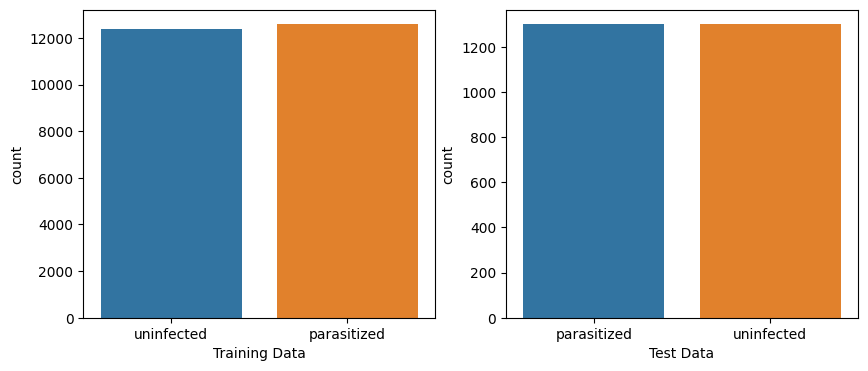

In [ ]:
#bar plot to show count of parasitized and uninfected images in train and test data
plt.figure(figsize = (10,4))
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data = y_train, x = "Label")
ax1.set(xlabel ='Training Data')
plt.subplot(1,2,2)
ax2 = sns.countplot(data = y_test, x = "Label")
ax2.set(xlabel ='Test Data')
plt.show()

####<b> Observations and insights: _____

*Both train and validation datasets are balanced with ~50% of the data in each category*

### <b>Data Exploration</b>
Let's visualize the images from the train data

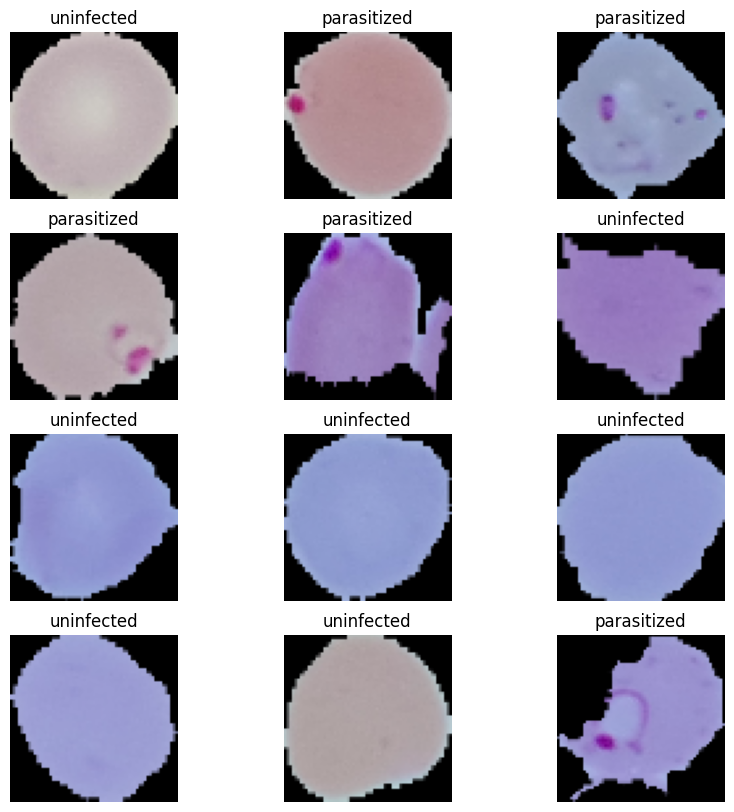

In [ ]:
#plot 12 randomly selected train data
plt.figure(1, figsize = (10 , 10))
for n in range(1, 13):
    plt.subplot(4, 3, n)
    index = int(np.random.randint(0, X_train.shape[0], 1))
    plt.title("{}".format(np.array(y_train)[index][0]))
    plt.imshow(X_train_normalized[index])
    plt.axis('off')

####<b> Observations and insights: _____

*Parasitized cells have varying degree of pink/purple patches indicating the presence of Plasmodium parasite. These patches are not visible in the uninfected cells, indicating the absence of Plasmodium parasite*

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

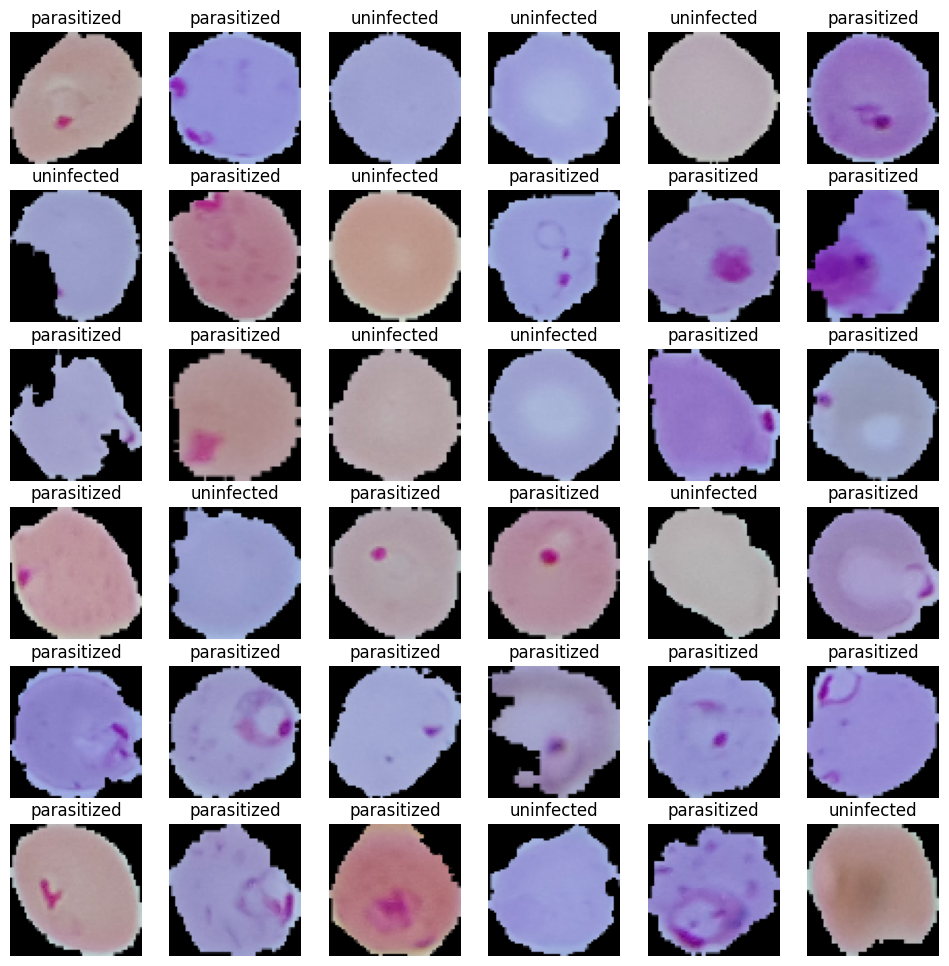

In [ ]:
#plot 36 randomly selected images in 6x6 grid
plt.figure(1, figsize = (12 , 12))
for n in range(1, 37):
    plt.subplot(6, 6, n)
    index = int(np.random.randint(0, X_train.shape[0], 1))
    plt.title("{}".format(np.array(y_train)[index][0]))
    plt.imshow(X_train_normalized[index])
    plt.axis('off')

####<b>Observations and insights:

*Parasitized cells have varying degree of pink/purple patches indicating the presence of Plasmodium parasite. These patches are not visible in the uninfected cells, indicating the absence of Plasmodium parasite*

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
#calculate mean of parasitized images array in train dataset
parasitized_mean = np.mean(X_train_normalized[y_train['Label'] == 'parasitized'], axis = 0)

In [ ]:
#calculate mean of uninfected images array in train dataset
uninfected_mean = np.mean(X_train_normalized[y_train['Label'] == 'uninfected'], axis = 0)

<b> Mean image for parasitized

(-0.5, 63.5, 63.5, -0.5)

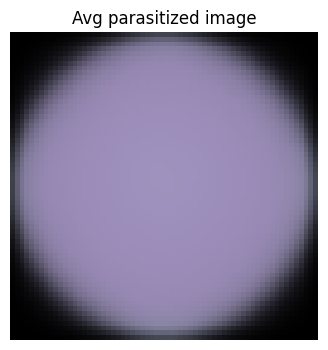

In [ ]:
#plot mean parasitized image in train dataset
plt.figure(figsize = (4 , 4))
plt.imshow(parasitized_mean)
plt.title("Avg parasitized image")
plt.axis("off")

<b> Mean image for uninfected

(-0.5, 63.5, 63.5, -0.5)

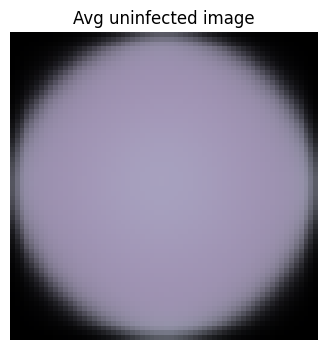

In [ ]:
#plot mean uninfected image in train dataset
plt.figure(1, figsize = (4 , 4))
plt.imshow(uninfected_mean)
plt.title("Avg uninfected image")
plt.axis("off")

####<b> Observations and insights: _____

*An average parasitized cell and an average uninfected cell look very similar to the naked eye*

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
X_train_HSV=[]   # to hold the HSV image array
for i in range(X_train.shape[0]):
  hsv = cv2.cvtColor(X_train[i], cv2.COLOR_BGR2HSV)   # convert RGB to HSV
  hsv_normalized = cv2.normalize(hsv.astype('float'), None, 0, 1, cv2.NORM_MINMAX)  #normalized HSV between 0 and 1
  X_train_HSV.append(hsv_normalized)

X_train_HSV = np.array(X_train_HSV)

[23655 15796   861]


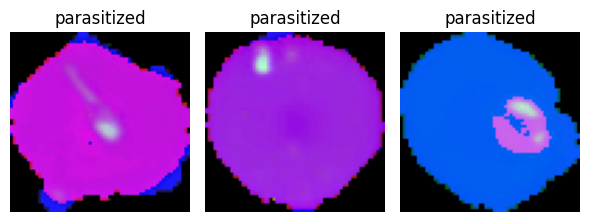

In [ ]:
img_cnt_train = np.random.randint(1, X_train.shape[0], 3)
print(img_cnt_train)
fig, ax = plt.subplots(1, 3, figsize = (6, 6))

for t, i in zip(range(10), img_cnt_train):
  ax[t].set_title(np.array(y_train)[i][0])
  ax[t].imshow(X_train_HSV[i])
  ax[t].set_axis_off()
  fig.tight_layout()

###<b> Converting the test data

In [ ]:
X_test_HSV=[]   # to hold the HSV image array
for i in range(X_test.shape[0]):
  hsv = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2HSV)   # convert RGB to HSV
  hsv_normalized = cv2.normalize(hsv.astype('float'), None, 0, 1, cv2.NORM_MINMAX) #normalized HSV between 0 and 1
  X_test_HSV.append(hsv_normalized)

X_test_HSV = np.array(X_test_HSV)

[1475 2295  525]


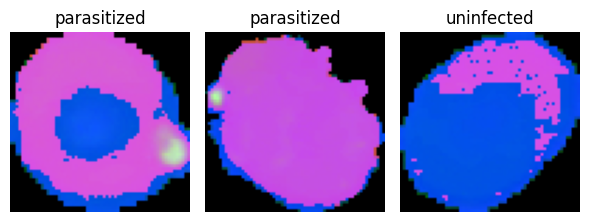

In [ ]:
img_cnt_test = np.random.randint(1, X_test.shape[0], 3)
print(img_cnt_test)

fig, ax = plt.subplots(1, 3, figsize = (6,6))

for t, i in zip(range(10), img_cnt_test):
  ax[t].set_title(np.array(y_test)[i][0])
  ax[t].imshow(X_test_HSV[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####<b>Observations and insights: _____

*RGB colored images have been convereted to HSV colored images. In this case, the task can involve recognizing prasitized cells based on color, the HSV color space can provide a more intuitive representation of color information.*

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
X_train_GB=[]   # to hold the Gaussian Blur image array
for i in range(X_train.shape[0]):
  a = cv2.GaussianBlur(X_train_normalized[i], (5, 5), 0)   # convert RGB to GB
  X_train_GB.append(a)

X_train_GB = np.array(X_train_GB)

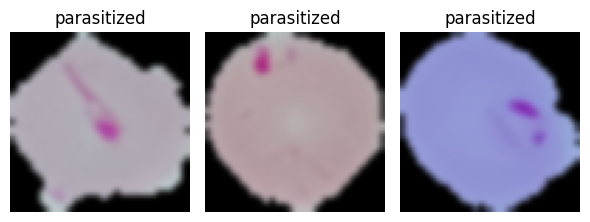

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (6,6))

for t, i in zip(range(10), img_cnt_train):
  ax[t].set_title(np.array(y_train)[i][0])
  ax[t].imshow(X_train_GB[i])
  ax[t].set_axis_off()
  fig.tight_layout()

In [ ]:
#Convert HSV to GB
X_train_GB2=[]   # to hold the Gaussian Blur image array
for i in range(X_train.shape[0]):
  a = cv2.GaussianBlur(X_train_HSV[i], (5, 5), 0)   # convert HSV to GB
  X_train_GB2.append(a)

X_train_GB2 = np.array(X_train_GB2)

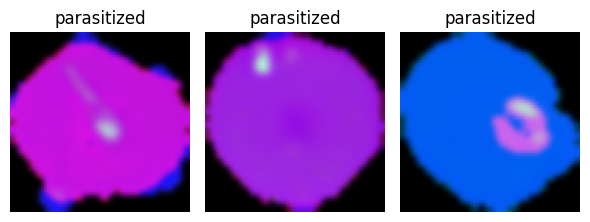

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (6,6))

for t, i in zip(range(10), img_cnt_train):
  ax[t].set_title(np.array(y_train)[i][0])
  ax[t].imshow(X_train_GB2[i])
  ax[t].set_axis_off()
  fig.tight_layout()

###<b> Gaussian Blurring on test data

In [ ]:
X_test_GB=[]   # to hold the Gaussian Blur image array
for i in range(X_test.shape[0]):
  a = cv2.GaussianBlur(X_test_normalized[i], (5, 5), 0)   # convert RGB to GB
  X_test_GB.append(a)

X_test_GB = np.array(X_test_GB)

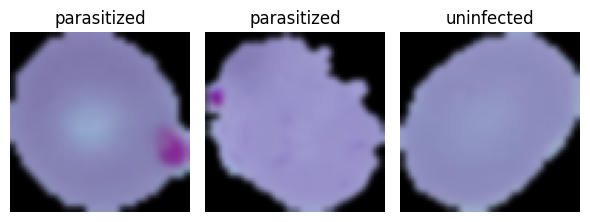

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (6,6))

for t, i in zip(range(10), img_cnt_test):
  ax[t].set_title(np.array(y_test)[i][0])
  ax[t].imshow(X_test_GB[i])
  ax[t].set_axis_off()
  fig.tight_layout()

In [ ]:
#Convert HSV to GB
X_test_GB2=[]   # to hold the Gaussian Blur image array
for i in range(X_test.shape[0]):
  a = cv2.GaussianBlur(X_test_HSV[i], (5, 5), 0)   # convert HSV to GB
*  X_test_GB2.append(a)

X_test_GB2 = np.array(X_test_GB2)

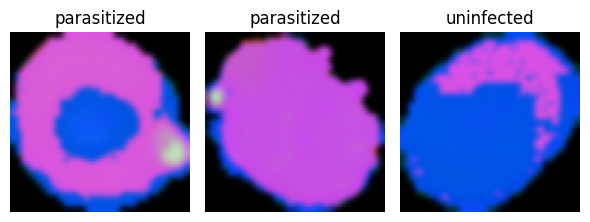

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (6,6))

for t, i in zip(range(10), img_cnt_test):
  ax[t].set_title(np.array(y_test)[i][0])
  ax[t].imshow(X_test_GB2[i])
  ax[t].set_axis_off()
  fig.tight_layout()

####**Observations and insights: _____**



**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

*Microscope images can have various forms of noise, such as electronic noise, sensor noise. Gausian Blur can remove them by filtering out high frquency noise. It can also help by reducing unwanted contents that are not crucial for this project, rather emphasizing more significant features and simplifying the input data for CNN.*

*Other image pre-processing that can be done are converting the image to gray scale, which would reduce computational complexity and still retain important structural information.*

*Edge detection filter can also be used as it can enhance edges in the images , which can be an important feature to detect infection.*

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model # Sequential API for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  # Regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import losses, optimizers
import random
from random import shuffle

In [ ]:
# Cleare backend
backend.clear_session()

#initialize random seed to 42
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

####<B>One Hot Encoding the train and test labels

In [ ]:
#training labels one hot encoding
y_train_encoded = []
for label_name in y_train["Label"]:
    if(label_name == 'parasitized'):
        y_train_encoded.append(0)

    if(label_name == 'uninfected'):
        y_train_encoded.append(1)

y_train_encoded = to_categorical(y_train_encoded)

y_train.iloc[0],y_train_encoded[0]

(Label    uninfected
 Name: 0, dtype: object,
 array([0., 1.], dtype=float32))

In [ ]:
#testing labels one hot encoding
y_test_encoded = []
for label_name in y_test["Label"]:
    if(label_name == 'parasitized'):
        y_test_encoded.append(0)

    if(label_name == 'uninfected'):
        y_test_encoded.append(1)

y_test_encoded = to_categorical(y_test_encoded)
y_test.iloc[0], y_test_encoded[0]

(Label    parasitized
 Name: 0, dtype: object,
 array([1., 0.], dtype=float32))

In [ ]:
test_accuracy = []

In [ ]:
model_name = []

###<b> Building the model

In [ ]:
model_name.append("model_base")

In [ ]:
#cnn base model
# Initialized a sequential model
model_base = Sequential()

#Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding
model_base.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (IMG_SIZE, IMG_SIZE, 3)))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model_base.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", padding = 'same'))

# Adding max pooling to reduce the size of the output of second convolutional layer
model_base.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the output of the convolutional layer after max pooling to make it ready for creating dense connections
model_base.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model_base.add(Dense(32, activation = "relu"))

# Adding the output layer with 2 neurons and 'sigmoid' activation function (for binary classification problem)
model_base.add(Dense(2, activation = 'sigmoid'))

model_base.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 32)                1048608   
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                        

###<b> Compiling the model

In [ ]:
# Compile model
model_base.compile(optimizer= SGD(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
fit_history_base = model_base.fit(X_train_normalized, y_train_encoded,callbacks = callbacks, validation_split = 0.2, verbose = 1, epochs = 20, batch_size = 64)

Epoch 1/20
312/312 [==============================] - 13s 8ms/step - loss: 0.6917 - accuracy: 0.5444 - val_loss: 0.6901 - val_accuracy: 0.5479
Epoch 2/20
 21/312 [=>............................] - ETA: 1s - loss: 0.6904 - accuracy: 0.5454

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


312/312 [==============================] - 2s 6ms/step - loss: 0.6890 - accuracy: 0.5777 - val_loss: 0.6871 - val_accuracy: 0.5781
Epoch 3/20
312/312 [==============================] - 2s 6ms/step - loss: 0.6861 - accuracy: 0.5996 - val_loss: 0.6838 - val_accuracy: 0.6164
Epoch 4/20
312/312 [==============================] - 2s 6ms/step - loss: 0.6828 - accuracy: 0.6077 - val_loss: 0.6796 - val_accuracy: 0.6174
Epoch 5/20
312/312 [==============================] - 2s 6ms/step - loss: 0.6787 - accuracy: 0.6084 - val_loss: 0.6753 - val_accuracy: 0.5998
Epoch 6/20
312/312 [==============================] - 2s 6ms/step - loss: 0.6741 - accuracy: 0.6021 - val_loss: 0.6698 - val_accuracy: 0.6230
Epoch 7/20
312/312 [==============================] - 2s 6ms/step - loss: 0.6693 - accuracy: 0.6049 - val_loss: 0.6650 - val_accuracy: 0.6254
Epoch 8/20
312/312 [==============================] - 2s 6ms/step - loss: 0.6651 - accuracy: 0.6029 - val_loss: 0.6597 - val_accuracy: 0.6098
Epoch 9/20
312/31

<b>Plotting the train and validation curves

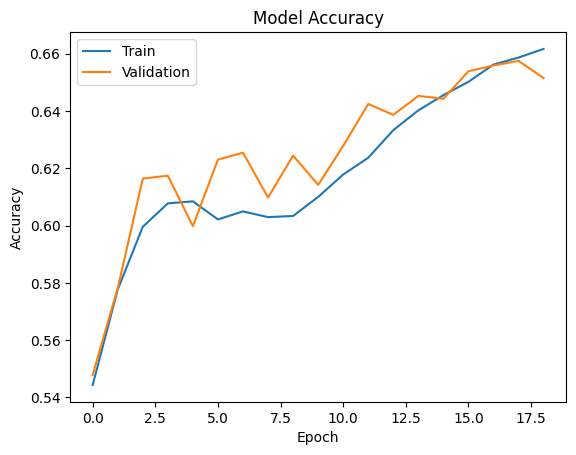

In [ ]:
plt.plot(fit_history_base.history['accuracy'])
plt.plot(fit_history_base.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

###<b> Evaluating the model on test data

In [ ]:
test_accuracy.append(model_base.evaluate(X_test_normalized, y_test_encoded, verbose = 1)[1])
print('\n', f'Test accuracy is {test_accuracy[-1]*100:.2f}%')

82/82 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.6042

 Test accuracy is 60.42%


In [ ]:
#Predictions on the test data
test_pred = model_base.predict(X_test_normalized)
test_pred = np.argmax(test_pred, axis = -1)

82/82 [==============================] - 0s 2ms/step


In [ ]:
# Calculating the probability of the predicted class
test_max_probas = np.max(model_base.predict(X_test_normalized), axis = 1)

82/82 [==============================] - 0s 2ms/step


In [ ]:
# Converting each entry to single label from one-hot encoded vector
y_test_arg = np.argmax(y_test_encoded, axis = -1)

<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.64      0.49      0.55      1300
           1       0.58      0.72      0.65      1300

    accuracy                           0.60      2600
   macro avg       0.61      0.60      0.60      2600
weighted avg       0.61      0.60      0.60      2600



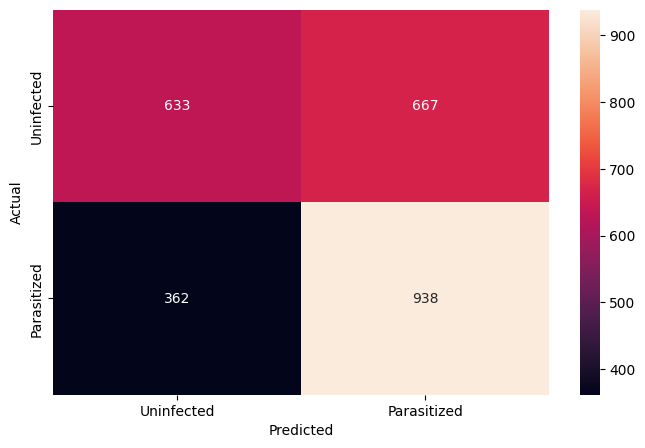

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test_arg,test_pred))

# Plotting the heatmap using confusion matrix

cm = tf.math.confusion_matrix(y_test_arg,test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

###Observations:

*The base model has 2 2D convolution layers of kernel size 3x3, activation function of ReLU, followed by max pooling to reduce the size of the output from the 2nd convolution layer. The result is flattened and sent to a fully connected dense layer of 32 neurons and "ReLU" activation. The output layer has 2 neurons and sigmoid activation function for binary classification.*

*This model has both training and validation accuracy of 66%, and test accuracy of 61%. In addition, the F1 score is .65 and precision of .58 and recall of .72.*

*So, the overall performance of this model has opportunity for improvement.*

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
#clear backend
backend.clear_session()

#initialize random seed to 42
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

###<b> Building the Model

In [ ]:
model_name.append("model1")

In [ ]:
#cnn_model_1
# Initialized a sequential model
model1 = Sequential()

#Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding
model1.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", activation = "relu", input_shape = (IMG_SIZE, IMG_SIZE, 3)))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model1.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", padding = 'same'))

# Adding max pooling to reduce the size of the output of second convolutional layer
model1.add(MaxPooling2D(pool_size = (2, 2)))

#Adding the third convolutional layer with 32 filters and the kernel size of 3x3, and 'same' padding
model1.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", padding = "same"))

# Adding the fourth convolutional layer with 64 filters and the kernel size of 3x3
model1.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu", padding = 'same'))

# Adding max pooling to reduce the size of the output of second convolutional layer
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the output of the convolutional layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model1.add(Dense(32, activation = "relu"))

# Adding dropout to randomly switch off 50% neurons to reduce overfitting
model1.add(Dropout(0.5))

# Adding the output layer with 2 neurons and 'sigmoid' activation function (for binary classification problem)
model1.add(Dense(2, activation = 'sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                   

###<b> Compiling the model

In [ ]:
# Compile model
model1.compile(optimizer= Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
fit_history_1 = model1.fit(X_train_normalized, y_train_encoded,callbacks = callbacks, validation_split = 0.2, verbose = 1, epochs = 20, batch_size = 128)

Epoch 1/20
156/156 [==============================] - 6s 18ms/step - loss: 0.6589 - accuracy: 0.6056 - val_loss: 0.5195 - val_accuracy: 0.8267
Epoch 2/20
 11/156 [=>............................] - ETA: 1s - loss: 0.5591 - accuracy: 0.7884

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


156/156 [==============================] - 2s 12ms/step - loss: 0.3999 - accuracy: 0.8544 - val_loss: 0.3635 - val_accuracy: 0.8427
Epoch 3/20
156/156 [==============================] - 2s 12ms/step - loss: 0.1756 - accuracy: 0.9432 - val_loss: 0.0805 - val_accuracy: 0.9756
Epoch 4/20
156/156 [==============================] - 2s 12ms/step - loss: 0.1279 - accuracy: 0.9573 - val_loss: 0.1168 - val_accuracy: 0.9607
Epoch 5/20
156/156 [==============================] - 2s 12ms/step - loss: 0.1109 - accuracy: 0.9643 - val_loss: 0.0689 - val_accuracy: 0.9792
Epoch 6/20
156/156 [==============================] - 2s 12ms/step - loss: 0.0925 - accuracy: 0.9671 - val_loss: 0.0711 - val_accuracy: 0.9764
Epoch 7/20
156/156 [==============================] - 2s 12ms/step - loss: 0.0903 - accuracy: 0.9707 - val_loss: 0.0680 - val_accuracy: 0.9792
Epoch 8/20
156/156 [==============================] - 2s 12ms/step - loss: 0.0847 - accuracy: 0.9711 - val_loss: 0.0699 - val_accuracy: 0.9766
Epoch 9/20

<b> Plotting the train and the validation curves

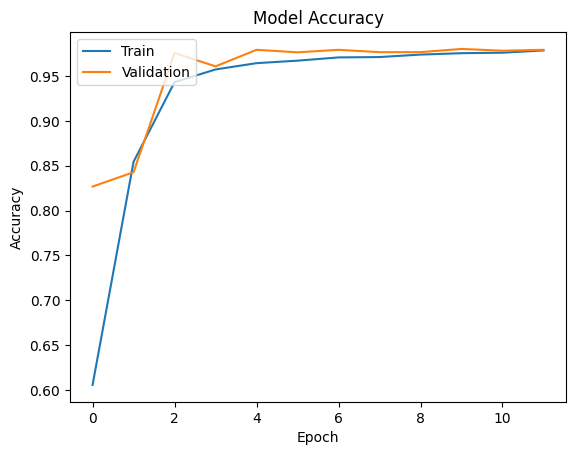

In [ ]:
plt.plot(fit_history_1.history['accuracy'])
plt.plot(fit_history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

###<b> Evaluating the model

In [ ]:
test_accuracy.append(model1.evaluate(X_test_normalized, y_test_encoded, verbose = 1)[1])
print('\n', f'Test accuracy is {test_accuracy[-1]*100:.2f}%')

82/82 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9873

 Test accuracy is 98.73%


In [ ]:
#Predictions on the test data
test_pred = model1.predict(X_test_normalized)
test_pred = np.argmax(test_pred, axis = -1)

82/82 [==============================] - 0s 2ms/step


In [ ]:
# Calculating the probability of the predicted class
test_max_probas = np.max(model1.predict(X_test_normalized), axis = 1)

82/82 [==============================] - 0s 2ms/step


In [ ]:
# Converting each entry to single label from one-hot encoded vector
y_test_arg = np.argmax(y_test_encoded, axis = -1)

<b> Plotting the confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1300
           1       0.98      0.99      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



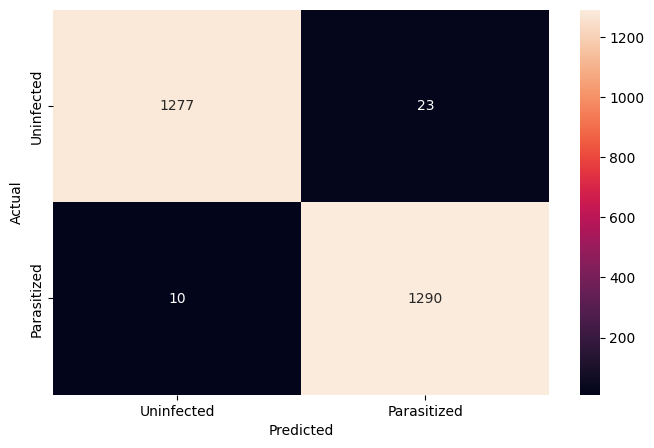

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_arg,test_pred))

# Plotting the heatmap using confusion matrix
cm = tf.math.confusion_matrix(y_test_arg,test_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###Observations:

*This model has 2 more 2D covolution layers of 32 filters and 64 filters respectively, on top of the base model's has 2 2D convolution layers. Dropout rate of 50% is introduced to reduce overfitting. Also, the optimizer was changed to Adam.*

*This model has a much improved training and validation accuracy of 98%, and test accuracy of 99%. In addition, the F1 score is .99 and precision of .98 and recall of .99.*

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
#clear backend
backend.clear_session()

#initialize random seed to 42
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

###<b> Building the Model

In [ ]:
model_name.append("model2")

In [ ]:
#cnn_model_2
# Initialized a sequential model
model2 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding
model2.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (IMG_SIZE, IMG_SIZE, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
model2.add(MaxPooling2D(pool_size = (2, 2)))

# Adding BatchNormalization
model2.add(BatchNormalization())

# Adding the third convolutional layer with 32 filters and the kernel size of 3x3
model2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding the fourth convolutional layer with 64 filters and the kernel size of 3x3
model2.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of fourth convolutional layer
model2.add(MaxPooling2D(pool_size = (2, 2)))

# Adding BatchNormalization
model2.add(BatchNormalization())

# Flattening the output of the convolutional layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model2.add(Dense(32))

# Adding LeakyRelu activation function with a negative slope of 0.1
model2.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 50% neurons to reduce overfitting
model2.add(Dropout(0.5))

# Adding the output layer with 2 neurons and 'sigmoid' activation function (for binary classification problem)
model2.add(Dense(2, activation = 'sigmoid'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                         

###<b>Compiling the model

In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

<b> Using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
fit_history_2 = model2.fit(X_train_normalized, y_train_encoded,callbacks = callbacks, validation_split = 0.2, verbose = 1, epochs = 30, batch_size = 128)

Epoch 1/30
156/156 [==============================] - 6s 19ms/step - loss: 0.5885 - accuracy: 0.7544 - val_loss: 3.4129 - val_accuracy: 0.4990
Epoch 2/30
 11/156 [=>............................] - ETA: 1s - loss: 0.2018 - accuracy: 0.9325

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


156/156 [==============================] - 2s 14ms/step - loss: 0.1451 - accuracy: 0.9552 - val_loss: 2.5403 - val_accuracy: 0.5272
Epoch 3/30
156/156 [==============================] - 2s 14ms/step - loss: 0.1079 - accuracy: 0.9668 - val_loss: 0.4641 - val_accuracy: 0.8876
Epoch 4/30
156/156 [==============================] - 2s 14ms/step - loss: 0.0892 - accuracy: 0.9715 - val_loss: 0.1232 - val_accuracy: 0.9625
Epoch 5/30
156/156 [==============================] - 2s 13ms/step - loss: 0.0778 - accuracy: 0.9762 - val_loss: 0.1262 - val_accuracy: 0.9605
Epoch 6/30
156/156 [==============================] - 2s 14ms/step - loss: 0.0753 - accuracy: 0.9766 - val_loss: 0.0708 - val_accuracy: 0.9738
Epoch 7/30
156/156 [==============================] - 2s 14ms/step - loss: 0.0595 - accuracy: 0.9808 - val_loss: 0.0997 - val_accuracy: 0.9722
Epoch 8/30
156/156 [==============================] - 2s 13ms/step - loss: 0.0569 - accuracy: 0.9801 - val_loss: 0.1000 - val_accuracy: 0.9724


<b>Plotting the train and validation accuracy

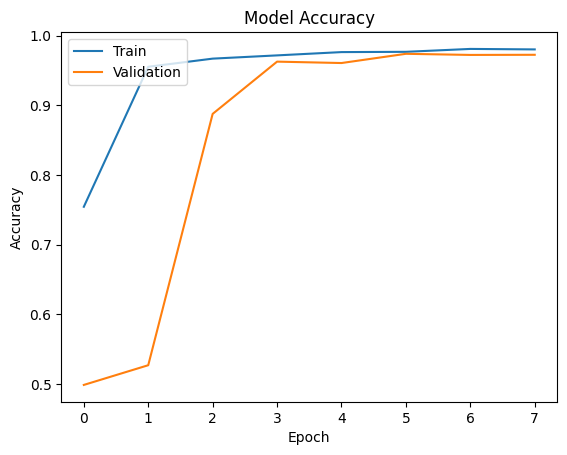

In [ ]:
plt.plot(fit_history_2.history['accuracy'])
plt.plot(fit_history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

###<b>Evaluating the model

In [ ]:
test_accuracy.append(model2.evaluate(X_test_normalized, y_test_encoded, verbose = 1)[1])
print('\n', f'Test accuracy is {test_accuracy[-1]*100:.2f}%')

82/82 [==============================] - 1s 4ms/step - loss: 0.0670 - accuracy: 0.9842

 Test accuracy is 98.42%


In [ ]:
#Predictions on the test data
test_pred = model2.predict(X_test_normalized)
test_pred = np.argmax(test_pred, axis = -1)

82/82 [==============================] - 0s 3ms/step


In [ ]:
# Calculating the probability of the predicted class
test_max_probas = np.max(model2.predict(X_test_normalized), axis = 1)

82/82 [==============================] - 0s 2ms/step


In [ ]:
# Converting each entry to single label from one-hot encoded vector
y_test_arg = np.argmax(y_test_encoded, axis = -1)

<b> Generate the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



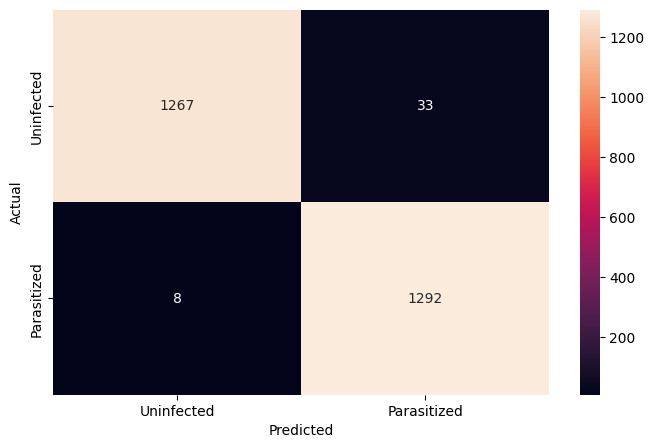

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_arg,test_pred))

# Plotting the heatmap using confusion matrix
cm = tf.math.confusion_matrix(y_test_arg,test_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###Observations:

*This model adds 2 layers of Batch Normalization to the previous model, and replaces the ReLU activation function with LeakyReLU of negative slope of 0.1.*

*From a performance perspective, the traning,  validation and test accuracies are around 98%. The F1 score is .98, precision of .98 and recall of .99.*

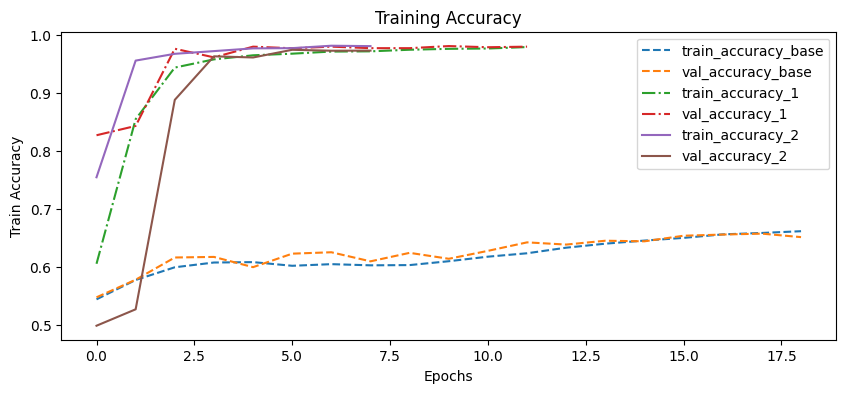

In [ ]:
# Plot train accuracy and validation accuracy
plt.figure(figsize = (10, 4))

plt.plot(fit_history_base.epoch, fit_history_base.history['accuracy'], ls = '--', label = 'train_accuracy_base')

plt.plot(fit_history_base.epoch, fit_history_base.history['val_accuracy'], ls = '--', label = 'val_accuracy_base')

plt.plot(fit_history_1.epoch, fit_history_1.history['accuracy'], ls = '-.', label = 'train_accuracy_1')

plt.plot(fit_history_1.epoch, fit_history_1.history['val_accuracy'], ls = '-.', label = 'val_accuracy_1')

plt.plot(fit_history_2.epoch, fit_history_2.history['accuracy'], ls = '-', label = 'train_accuracy_2')

plt.plot(fit_history_2.epoch, fit_history_2.history['val_accuracy'], ls = '-', label = 'val_accuracy_2')

plt.ylabel('Train Accuracy')

plt.xlabel('Epochs')

plt.title('Training Accuracy')

plt.legend()

plt.show()



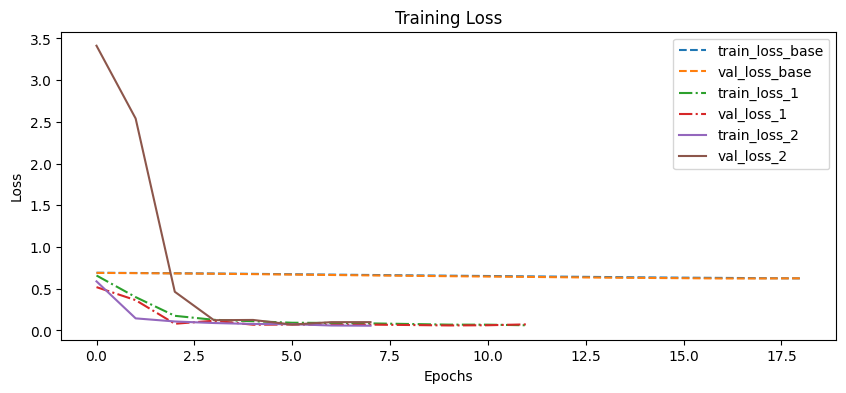

In [ ]:
#plot training and validation loss
plt.figure(figsize = (10, 4))

plt.plot(fit_history_base.epoch, fit_history_base.history['loss'], ls = '--', label = 'train_loss_base')

plt.plot(fit_history_base.epoch, fit_history_base.history['val_loss'], ls = '--', label = 'val_loss_base')

plt.plot(fit_history_1.epoch, fit_history_1.history['loss'], ls = '-.', label = 'train_loss_1')

plt.plot(fit_history_1.epoch, fit_history_1.history['val_loss'], ls = '-.', label = 'val_loss_1')

plt.plot(fit_history_2.epoch, fit_history_2.history['loss'], ls = '-', label = 'train_loss_2')

plt.plot(fit_history_2.epoch, fit_history_2.history['val_loss'], ls = '-', label = 'val_loss_2')

plt.ylabel('Loss')

plt.xlabel('Epochs')

plt.title('Training Loss')

plt.legend()

plt.show()


[0.6042307615280151, 0.9873076677322388, 0.9842307567596436]


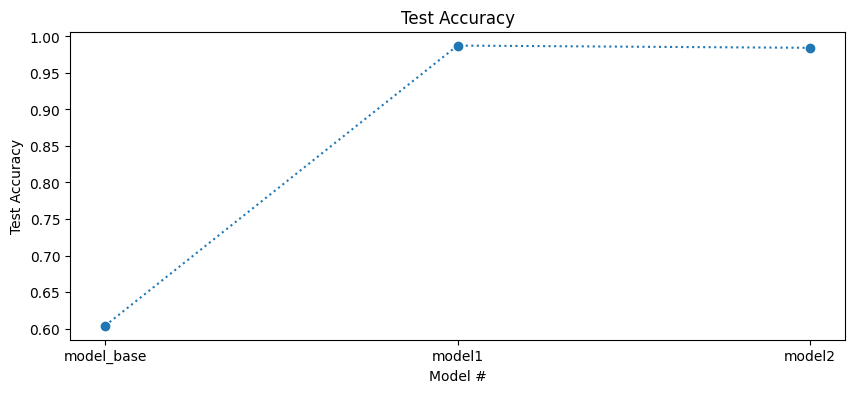

In [ ]:
print(test_accuracy)

#plot test accuracy
plt.figure(figsize = (10, 4))

plt.plot(model_name, test_accuracy, ls = ":", label = "test_accuracy", marker = "o")

plt.xlabel("Model #")

lt.ylabel("Test Accuracy")

plt.title("Test Accuracy")

plt.show()

####<b>Observations and insights: ____


*    *Among the 3 models, the base model has poor accuracy, while models 1 and 2 have comparable performances across all key metrics, with model 2 being slightly better.*

*   *In this scenario, recall is a more important metric than precision, because the cost associated with false negative, i.e. missing a true case of malaria infection, will be high because the sickness is contagious*

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

###<b> Use image data generator

In [ ]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train_normalized, y_train_encoded, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
tr_datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True,
                                zoom_range = 0.5, rotation_range = 0.3,
                                width_shift_range = 0.3, height_shift_range = 0.3)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = tr_datagen.flow(x = X_tr, y = y_tr, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

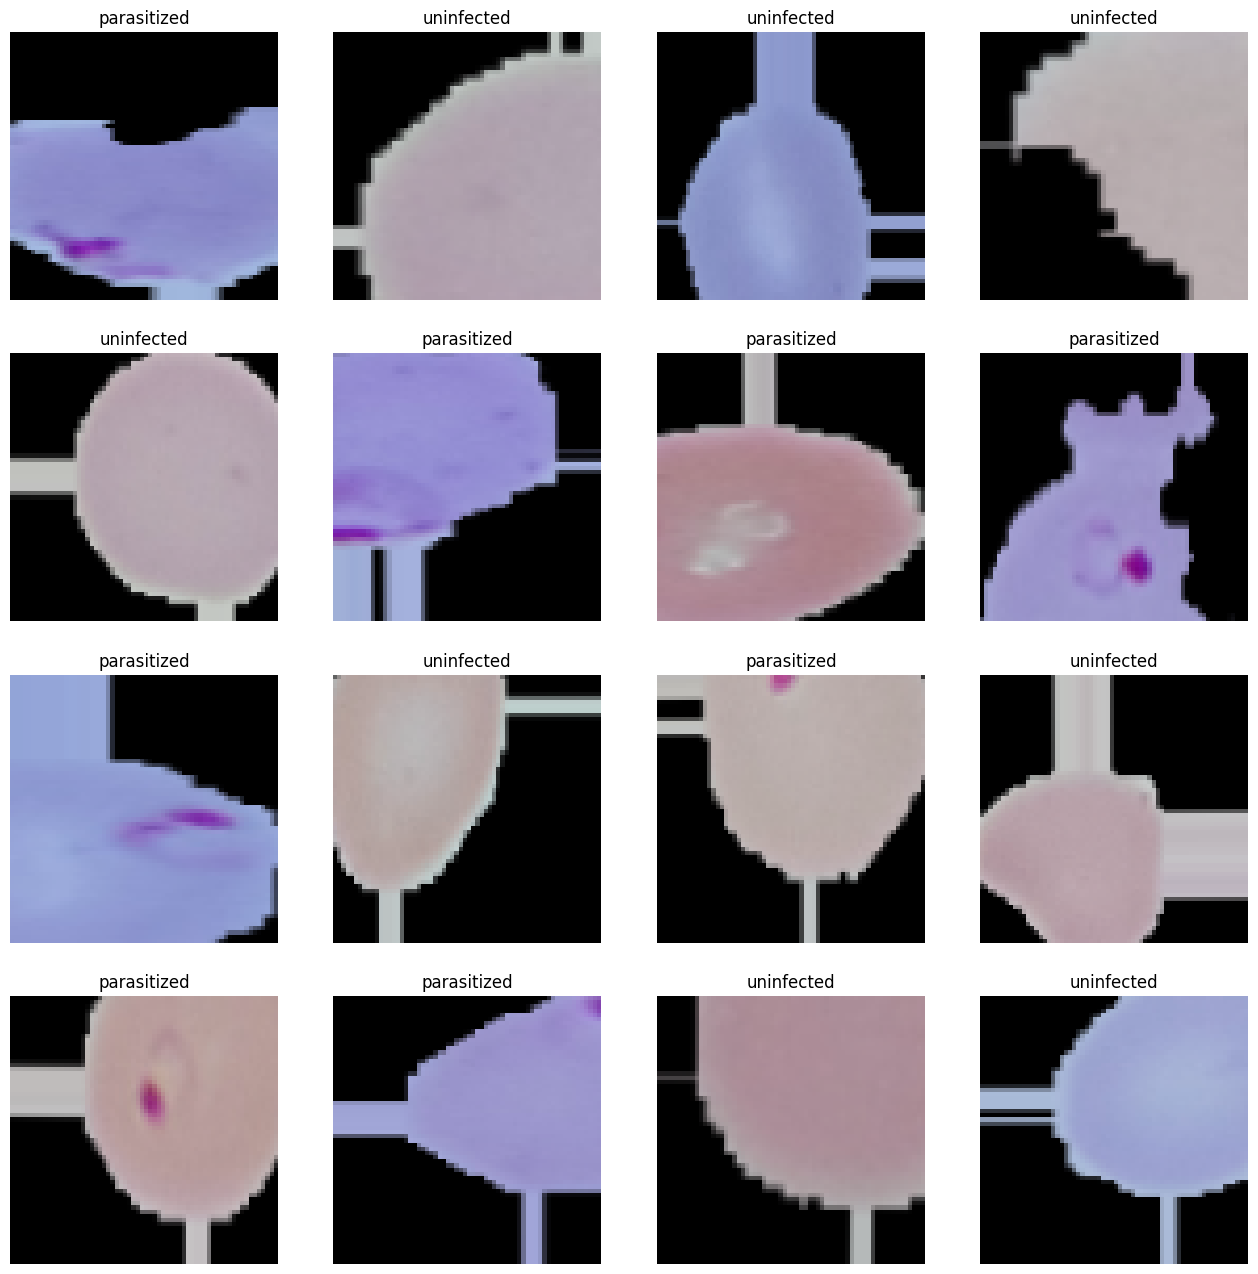

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 0:
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')

####<b>Observations and insights: ____

*The traning data has been augmented through rotaion, flipping, height/width shifting, and zooming.*

###<b>Building the Model

In [ ]:
#clear backend
backend.clear_session()

#initialize random seed to 42
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
model_name.append("model3")

In [ ]:
#cnn_model_3
# Initialized a sequential model
model3 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding
model3.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (IMG_SIZE, IMG_SIZE, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model3.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model3.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
model3.add(MaxPooling2D(pool_size = (2, 2)))

# Adding BatchNormalization
model3.add(BatchNormalization())

# Adding the third convolutional layer with 32 filters and the kernel size of 3x3
model3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model3.add(LeakyReLU(0.1))

# Adding the fourth convolutional layer with 64 filters and the kernel size of 3x3
model3.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model3.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of fourth convolutional layer
model3.add(MaxPooling2D(pool_size = (2, 2)))

# Adding BatchNormalization
model3.add(BatchNormalization())

# Flattening the output of the convolutional layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model3.add(Dense(32))

# Adding LeakyRelu activation function with a negative slope of 0.1
model3.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 50% neurons to reduce overfitting
model3.add(Dropout(0.5))

# Adding the output layer with 2 neurons and 'sigmoid' activation function (for binary classification problem)
model3.add(Dense(2, activation = 'sigmoid'))

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                         

In [ ]:
model3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
fit_history_3 = model3.fit(train_generator, validation_data = val_generator,callbacks = callbacks, validation_split = 0.2, verbose = 1, epochs = 30, batch_size = 128)

Epoch 1/30
312/312 [==============================] - 29s 84ms/step - loss: 0.6744 - accuracy: 0.6752 - val_loss: 0.6914 - val_accuracy: 0.5657
Epoch 2/30
  1/312 [..............................] - ETA: 30s - loss: 0.4866 - accuracy: 0.8438

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


312/312 [==============================] - 26s 84ms/step - loss: 0.3436 - accuracy: 0.8679 - val_loss: 0.1441 - val_accuracy: 0.9435
Epoch 3/30
312/312 [==============================] - 26s 83ms/step - loss: 0.2967 - accuracy: 0.8887 - val_loss: 0.1187 - val_accuracy: 0.9585
Epoch 4/30
312/312 [==============================] - 26s 84ms/step - loss: 0.2749 - accuracy: 0.9011 - val_loss: 0.1051 - val_accuracy: 0.9728
Epoch 5/30
312/312 [==============================] - 26s 84ms/step - loss: 0.2579 - accuracy: 0.9048 - val_loss: 0.1729 - val_accuracy: 0.9355
Epoch 6/30
312/312 [==============================] - 26s 85ms/step - loss: 0.2493 - accuracy: 0.9083 - val_loss: 0.0909 - val_accuracy: 0.9702
Epoch 7/30
312/312 [==============================] - 26s 84ms/step - loss: 0.2367 - accuracy: 0.9124 - val_loss: 0.1028 - val_accuracy: 0.9704
Epoch 8/30
312/312 [==============================] - 26s 83ms/step - loss: 0.2272 - accuracy: 0.9170 - val_loss: 0.1281 - val_accuracy: 0.9581


###<B>Evaluating the model

<b>Plot the train and validation accuracy

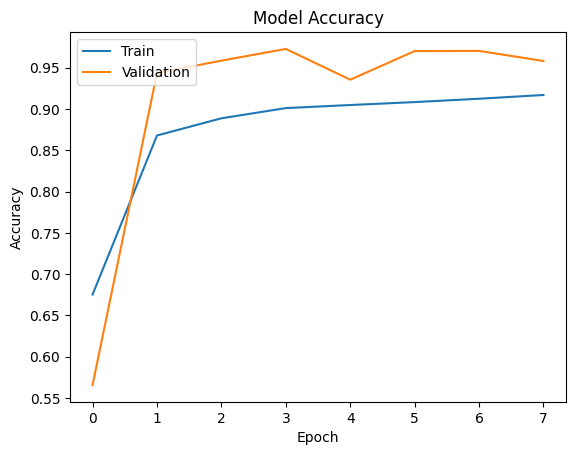

In [ ]:
plt.plot(fit_history_3.history['accuracy'])
plt.plot(fit_history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

<B>Plotting the classification report and confusion matrix

In [ ]:
#Calculate accuracy
test_accuracy.append(model3.evaluate(X_test_normalized, y_test_encoded, verbose = 1)[1])
print('\n', f'Test accuracy is {test_accuracy[-1]*100:.2f}%')

82/82 [==============================] - 0s 3ms/step - loss: 0.0896 - accuracy: 0.9638

 Test accuracy is 96.38%


In [ ]:
#Predictions on the test data
test_pred = model3.predict(X_test_normalized)
test_pred = np.argmax(test_pred, axis = -1)

82/82 [==============================] - 0s 2ms/step


In [ ]:
# Calculating the probability of the predicted class
test_max_probas = np.max(model3.predict(X_test_normalized), axis = 1)

82/82 [==============================] - 0s 3ms/step


In [ ]:
# Converting each entry to single label from one-hot encoded vector
y_test_arg = np.argmax(y_test_encoded, axis = -1)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1300
           1       0.94      1.00      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.97      0.96      0.96      2600
weighted avg       0.97      0.96      0.96      2600



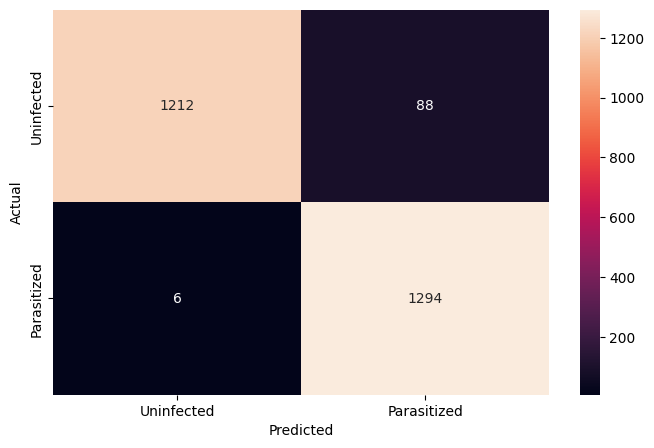

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_arg,test_pred))

# Plotting the heatmap using confusion matrix
cm = tf.math.confusion_matrix(y_test_arg,test_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

###Observations:

*The validation accuracy (96%) is slightly better than the training data (92%). The test accuracy came in at 96% as well.*

*F1 score is 1.0, precision is .94, and recall is .96. It has only 6 cases of missing a positive case of malaria. So, this model is a good one to detect parasitized cells*

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
#clear backend
backend.clear_session()

#initialize random seed to 42
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
model_name.append("model4")

In [ ]:
# Importing necessary libraries
from tensorflow.keras import Model

from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
vgg_model = VGG16(weights = 'imagenet',

                       include_top = False,

                       input_shape = (IMG_SIZE, IMG_SIZE, 3), pooling = 'max')

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Checking summary of the model
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
vgg_model.trainable = False

In [ ]:
# Add classification layers on top of it
x = Flatten()(vgg_model.output)

x = Dense(units = 2, activation = 'sigmoid')(x)

# Initializing the model
model4 = Model(vgg_model.input, x)

In [ ]:
model4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

###<b>Compiling the model

In [ ]:
model4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

<b> using callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
fit_history_4 = model4.fit(X_train_normalized, y_train_encoded,callbacks = callbacks, validation_split = 0.2, verbose = 1, epochs = 30, batch_size = 128)

Epoch 1/30
156/156 [==============================] - 6s 30ms/step - loss: 0.5026 - accuracy: 0.8099 - val_loss: 0.3906 - val_accuracy: 0.8624
Epoch 2/30
  1/156 [..............................] - ETA: 2s - loss: 0.4369 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


156/156 [==============================] - 3s 22ms/step - loss: 0.3528 - accuracy: 0.8783 - val_loss: 0.3139 - val_accuracy: 0.8922
Epoch 3/30
156/156 [==============================] - 3s 22ms/step - loss: 0.3024 - accuracy: 0.8911 - val_loss: 0.2786 - val_accuracy: 0.9071
Epoch 4/30
156/156 [==============================] - 3s 22ms/step - loss: 0.2757 - accuracy: 0.8998 - val_loss: 0.2571 - val_accuracy: 0.9105
Epoch 5/30
156/156 [==============================] - 3s 22ms/step - loss: 0.2579 - accuracy: 0.9058 - val_loss: 0.2427 - val_accuracy: 0.9157
Epoch 6/30
156/156 [==============================] - 3s 22ms/step - loss: 0.2465 - accuracy: 0.9092 - val_loss: 0.2317 - val_accuracy: 0.9197
Epoch 7/30
156/156 [==============================] - 3s 22ms/step - loss: 0.2355 - accuracy: 0.9135 - val_loss: 0.2235 - val_accuracy: 0.9209
Epoch 8/30
156/156 [==============================] - 3s 22ms/step - loss: 0.2274 - accuracy: 0.9157 - val_loss: 0.2170 - val_accuracy: 0.9233
Epoch 9/30

<b>Plot the train and validation accuracy

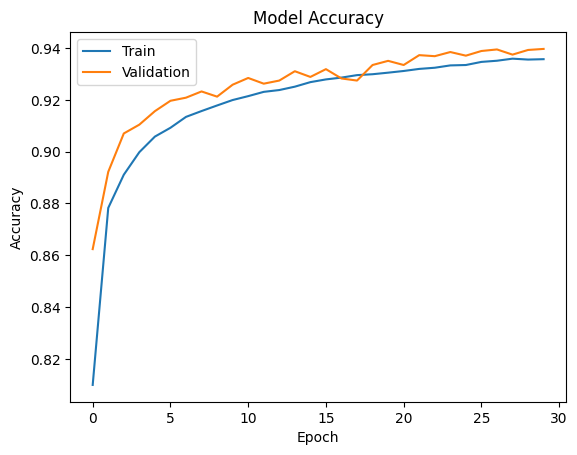

In [ ]:
plt.plot(fit_history_4.history['accuracy'])
plt.plot(fit_history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

###**Observations and insights: _____**

*   What can be observed from the validation and train curves?

*The train curve and validation curve are converging at 94% accuracy.*

*The accuracy of the training data keeps increasing as the number of epochs increase, indicating that the model is learning the training data with each epoch, and that thers are no signs of overfitting.*

###<b> Evaluating the model

In [ ]:
test_accuracy.append(model4.evaluate(X_test_normalized, y_test_encoded, verbose = 1)[1])
print('\n', f'Test accuracy is {test_accuracy[-1]*100:.2f}%')

82/82 [==============================] - 1s 8ms/step - loss: 0.2123 - accuracy: 0.9135

 Test accuracy is 91.35%


In [ ]:
#Predictions on the test data
test_pred = model4.predict(X_test_normalized)
test_pred = np.argmax(test_pred, axis = -1)

82/82 [==============================] - 1s 5ms/step


In [ ]:
# Calculating the probability of the predicted class
test_max_probas = np.max(model4.predict(X_test_normalized), axis = 1)

82/82 [==============================] - 0s 5ms/step


In [ ]:
# Converting each entry to single label from one-hot encoded vector
y_test_arg = np.argmax(y_test_encoded, axis = -1)

<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1300
           1       0.91      0.92      0.91      1300

    accuracy                           0.91      2600
   macro avg       0.91      0.91      0.91      2600
weighted avg       0.91      0.91      0.91      2600



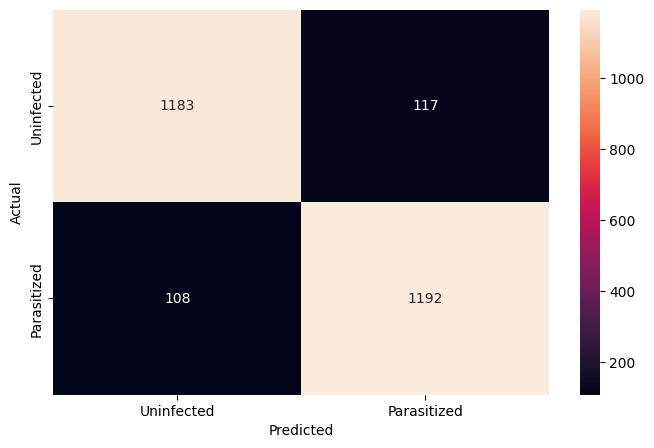

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_arg,test_pred))

# Plotting the heatmap using confusion matrix
cm = tf.math.confusion_matrix(y_test_arg,test_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

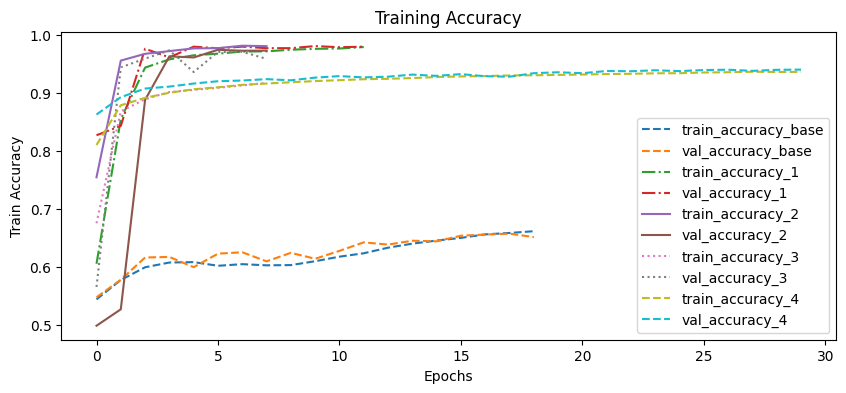

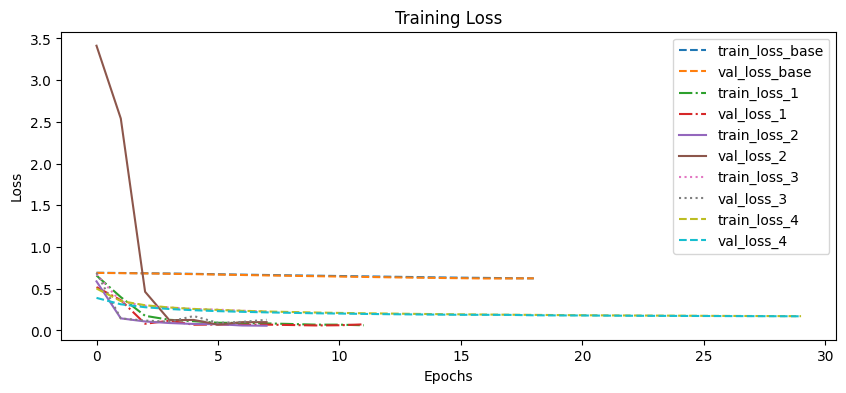

Test accuracy:  [0.6042307615280151, 0.9873076677322388, 0.9842307567596436, 0.9638461470603943, 0.9134615659713745]


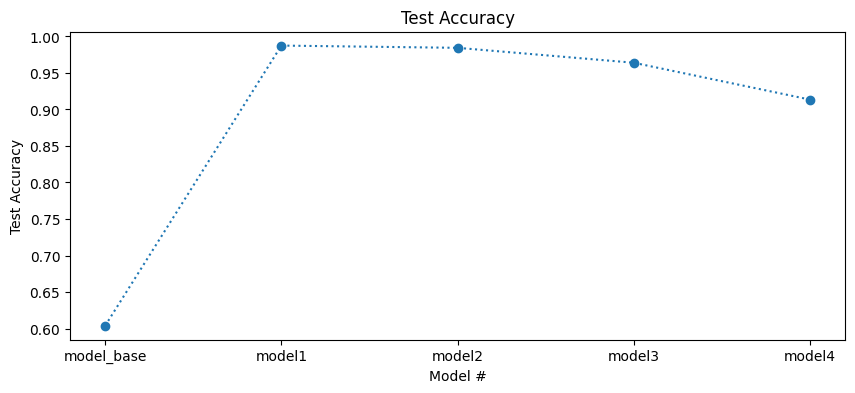

In [ ]:
# Plot train accuracy and validation accuracy
plt.figure(figsize = (10, 4))

plt.plot(fit_history_base.epoch, fit_history_base.history['accuracy'], ls = '--', label = 'train_accuracy_base')

plt.plot(fit_history_base.epoch, fit_history_base.history['val_accuracy'], ls = '--', label = 'val_accuracy_base')

plt.plot(fit_history_1.epoch, fit_history_1.history['accuracy'], ls = '-.', label = 'train_accuracy_1')

plt.plot(fit_history_1.epoch, fit_history_1.history['val_accuracy'], ls = '-.', label = 'val_accuracy_1')

plt.plot(fit_history_2.epoch, fit_history_2.history['accuracy'], ls = '-', label = 'train_accuracy_2')

plt.plot(fit_history_2.epoch, fit_history_2.history['val_accuracy'], ls = '-', label = 'val_accuracy_2')

plt.plot(fit_history_3.epoch, fit_history_3.history['accuracy'], ls = ':', label = 'train_accuracy_3')

plt.plot(fit_history_3.epoch, fit_history_3.history['val_accuracy'], ls = ':', label = 'val_accuracy_3')

plt.plot(fit_history_4.epoch, fit_history_4.history['accuracy'], ls = '--', label = 'train_accuracy_4')

plt.plot(fit_history_4.epoch, fit_history_4.history['val_accuracy'], ls = '--', label = 'val_accuracy_4')

plt.ylabel('Train Accuracy')

plt.xlabel('Epochs')

plt.title('Training Accuracy')

plt.legend()

plt.show()

#plot training and validation loss
plt.figure(figsize = (10, 4))

plt.plot(fit_history_base.epoch, fit_history_base.history['loss'], ls = '--', label = 'train_loss_base')

plt.plot(fit_history_base.epoch, fit_history_base.history['val_loss'], ls = '--', label = 'val_loss_base')

plt.plot(fit_history_1.epoch, fit_history_1.history['loss'], ls = '-.', label = 'train_loss_1')

plt.plot(fit_history_1.epoch, fit_history_1.history['val_loss'], ls = '-.', label = 'val_loss_1')

plt.plot(fit_history_2.epoch, fit_history_2.history['loss'], ls = '-', label = 'train_loss_2')

plt.plot(fit_history_2.epoch, fit_history_2.history['val_loss'], ls = '-', label = 'val_loss_2')

plt.plot(fit_history_3.epoch, fit_history_3.history['loss'], ls = ':', label = 'train_loss_3')

plt.plot(fit_history_3.epoch, fit_history_3.history['val_loss'], ls = ':', label = 'val_loss_3')

plt.plot(fit_history_4.epoch, fit_history_4.history['loss'], ls = '--', label = 'train_loss_4')

plt.plot(fit_history_4.epoch, fit_history_4.history['val_loss'], ls = '--', label = 'val_loss_4')

plt.ylabel('Loss')

plt.xlabel('Epochs')

plt.title('Training Loss')

plt.legend()

plt.show()

#plot test accuracy

print("Test accuracy: ",test_accuracy)

plt.figure(figsize = (10, 4))

plt.plot(model_name, test_accuracy, ls = ":", label = "test_accuracy", marker = "o")

plt.xlabel("Model #")

plt.ylabel("Test Accuracy")

plt.title("Test Accuracy")

plt.show()

###Observations:

* *By comparing the training and validation accuracy across the 5 models, model_base has the lowest accuracy, model4 (VGG16) has 94% accuracy, models 1 and 2 have the highest accuracy of 98-99%*

* *All the models are very generalized results and are not showing signs of overfitting.*

* *The test accuracy of all the models are comparable to their traning/validation accuracy. Models 1 and 2 have the highest test accuracy ~99%*

* *In terms of the confusion matrices and classification reports - models 1 and 2 have the best F1 score, precision and recall. Since misclassification of parasitized cell is less in model 2, I would recommend model 2 as the final model*

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


In [ ]:
final_pred = np.argmax(model2.predict(X_test_normalized), axis  = -1)

82/82 [==============================] - 0s 2ms/step


82/82 [==============================] - 0s 2ms/step


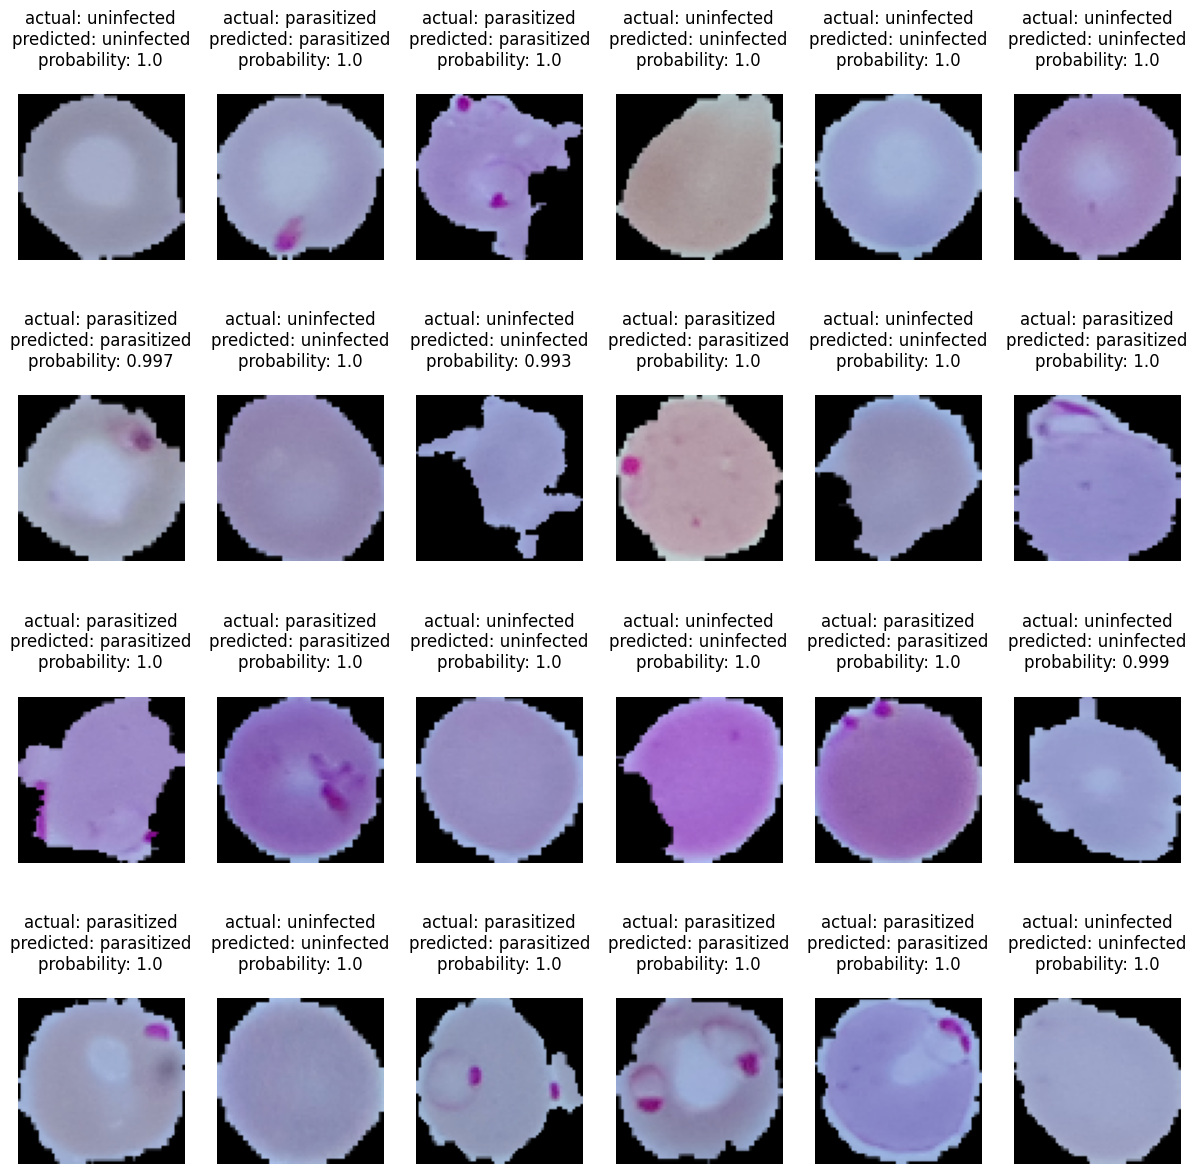

In [ ]:
rows = 4

cols = 6

fig = plt.figure(figsize = (15, 15))

for i in range(cols):

    for j in range(rows):

        random_index = np.random.randint(0, len(y_test_encoded))

        ax = fig.add_subplot(rows, cols, i * rows + j + 1)

        ax.imshow(X_test[random_index, :])

        if final_pred[random_index] == 0:
          pred_label = "parasitized"
        else:
          pred_label = "uninfected"

        true_label = np.array(y_test)[random_index][0]

        y_pred_test_max_probas = np.max(model2.predict(X_test_normalized), axis=1)

        pred_proba = y_pred_test_max_probas[random_index]

        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba))
        ax.axis("off")


plt.show()

####<b> Observations and Conclusions drawn from the final model: _____



* *The final model is able to predict the test image correctly with test accuracy close to 99%*

* *It has very low false negatives which is critical to accurately classify if a patient has malaria*

**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

* *Transfer learning can be applied to the dataset to improve accuracy. We can choose among multiple pre-trained models available in the Keras framework, such as ResNet, DenseNet, which are popular for image classification.*

* *Below I have built models using the HSV images and Gausian Blur images and compared them with the above models*

In [ ]:
#clear backend
backend.clear_session()

#initialize random seed to 42
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
model_name.append("model_hsv")

In [ ]:
#cnn_model_HSV image processing
# Initialized a sequential model
model_hsv = Sequential()

#Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding
model_hsv.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (IMG_SIZE, IMG_SIZE, 3)))

# Adding LeakyReLU activation
model_hsv.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model_hsv.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyReLU activation
model_hsv.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
model_hsv.add(MaxPooling2D(pool_size = (2, 2)))

#Adding the third convolutional layer with 32 filters and the kernel size of 3x3, and 'same' padding
model_hsv.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "same"))

# Adding LeakyReLU activation
model_hsv.add(LeakyReLU(0.1))

# Adding the fourth convolutional layer with 64 filters and the kernel size of 3x3
model_hsv.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyReLU activation
model_hsv.add(LeakyReLU(0.1))


# Adding max pooling to reduce the size of the output of second convolutional layer
model_hsv.add(MaxPooling2D(pool_size = (2, 2)))

#Adding the fifth convolutional layer with 128 filters and the kernel size of 3x3, and 'same' padding
model_hsv.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same"))

# Adding LeakyReLU activation
model_hsv.add(LeakyReLU(0.1))

# Adding the sixth convolutional layer with 256 filters and the kernel size of 3x3
model_hsv.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyReLU activation
model_hsv.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
model_hsv.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the output of the convolutional layer after max pooling to make it ready for creating dense connections
model_hsv.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model_hsv.add(Dense(32, activation = "relu"))

# Adding dropout to randomly switch off 40% neurons to reduce overfitting
model_hsv.add(Dropout(0.4))

# Adding the output layer with 2 neurons and 'sigmoid' activation function (for binary classification problem)
model_hsv.add(Dense(2, activation = 'sigmoid'))

model_hsv.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                        

In [ ]:
model_hsv.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Use model 5 to train HSV images
fit_history_hsv = model_hsv.fit(X_train_HSV, y_train_encoded,callbacks = callbacks, validation_split = 0.2, verbose = 1, epochs = 30, batch_size = 128)

Epoch 1/30
156/156 [==============================] - 6s 24ms/step - loss: 0.2558 - accuracy: 0.8901 - val_loss: 0.0645 - val_accuracy: 0.9798
Epoch 2/30
  5/156 [..............................] - ETA: 2s - loss: 0.1049 - accuracy: 0.9781

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


156/156 [==============================] - 3s 17ms/step - loss: 0.0795 - accuracy: 0.9769 - val_loss: 0.0596 - val_accuracy: 0.9818
Epoch 3/30
156/156 [==============================] - 3s 17ms/step - loss: 0.0642 - accuracy: 0.9803 - val_loss: 0.0648 - val_accuracy: 0.9796
Epoch 4/30
156/156 [==============================] - 3s 17ms/step - loss: 0.0622 - accuracy: 0.9808 - val_loss: 0.0632 - val_accuracy: 0.9804


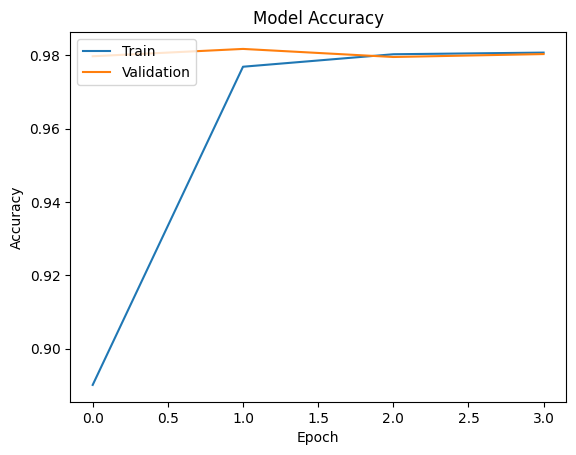

In [ ]:
plt.plot(fit_history_hsv.history['accuracy'])
plt.plot(fit_history_hsv.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

###<b> Evaluating the model

In [ ]:
test_accuracy.append(model_hsv.evaluate(X_test_HSV, y_test_encoded, verbose = 1)[1])
print('\n', f'Test accuracy is {test_accuracy[-1]*100:.2f}%')

82/82 [==============================] - 1s 5ms/step - loss: 0.0421 - accuracy: 0.9873

 Test accuracy is 98.73%


In [ ]:
#Predictions on the test data
test_pred = model_hsv.predict(X_test_HSV)
test_pred = np.argmax(test_pred, axis = -1)

82/82 [==============================] - 0s 3ms/step


In [ ]:
# Calculating the probability of the predicted class
test_max_probas = np.max(model_hsv.predict(X_test_HSV), axis = 1)

82/82 [==============================] - 0s 3ms/step


In [ ]:
# Converting each entry to single label from one-hot encoded vector
y_test_arg = np.argmax(y_test_encoded, axis = -1)

<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



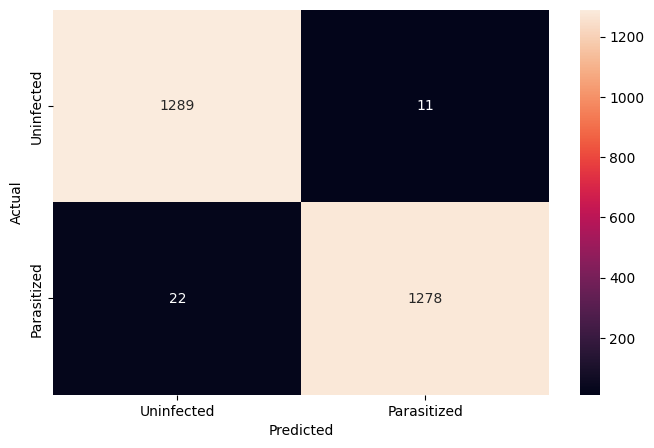

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_arg,test_pred))

# Plotting the heatmap using confusion matrix
cm = tf.math.confusion_matrix(y_test_arg,test_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#clear backend
backend.clear_session()

#initialize random seed to 42
seed = 42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
model_name.append("model_gb")

In [ ]:
#cnn_model_GB image processing
# Initialized a sequential model
model_gb = Sequential()

#Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding
model_gb.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (IMG_SIZE, IMG_SIZE, 3)))

# Adding LeakyReLU activation
model_gb.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model_gb.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyReLU activation
model_gb.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
model_gb.add(MaxPooling2D(pool_size = (2, 2)))

# Adding BatchNormalization
model_gb.add(BatchNormalization())

#Adding the third convolutional layer with 32 filters and the kernel size of 3x3, and 'same' padding
model_gb.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "same"))

# Adding LeakyReLU activation
model_gb.add(LeakyReLU(0.1))

# Adding the fourth convolutional layer with 64 filters and the kernel size of 3x3
model_gb.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyReLU activation
model_gb.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
model_gb.add(MaxPooling2D(pool_size = (2, 2)))

# Adding BatchNormalization
model_gb.add(BatchNormalization())

#Adding the fifth convolutional layer with 128 filters and the kernel size of 3x3, and 'same' padding
model_gb.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same"))

# Adding LeakyReLU activation
model_gb.add(LeakyReLU(0.1))

# Adding the sixth convolutional layer with 256 filters and the kernel size of 3x3
model_gb.add(Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyReLU activation
model_gb.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
model_gb.add(MaxPooling2D(pool_size = (2, 2)))

# Adding BatchNormalization
model_gb.add(BatchNormalization())

# Flattening the output of the convolutional layer after max pooling to make it ready for creating dense connections
model_gb.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model_gb.add(Dense(32, activation = "relu"))

# Adding dropout to randomly switch off 40% neurons to reduce overfitting
model_gb.add(Dropout(0.4))

# Adding the output layer with 2 neurons and 'sigmoid' activation function (for binary classification problem)
model_gb.add(Dense(2, activation = 'sigmoid'))

model_gb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                         

In [ ]:
model_gb.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

In [ ]:
# Use model gb to train HSV images
fit_history_gb = model_gb.fit(X_train_GB, y_train_encoded,callbacks = callbacks, validation_split = 0.2, verbose = 1, epochs = 30, batch_size = 128)

Epoch 1/30
156/156 [==============================] - 7s 24ms/step - loss: 0.6633 - accuracy: 0.6189 - val_loss: 0.7851 - val_accuracy: 0.4990
Epoch 2/30
  4/156 [..............................] - ETA: 2s - loss: 0.4239 - accuracy: 0.9277

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


156/156 [==============================] - 3s 19ms/step - loss: 0.3563 - accuracy: 0.9450 - val_loss: 0.7161 - val_accuracy: 0.4998
Epoch 3/30
156/156 [==============================] - 3s 18ms/step - loss: 0.3000 - accuracy: 0.9650 - val_loss: 0.3609 - val_accuracy: 0.9028
Epoch 4/30
156/156 [==============================] - 3s 18ms/step - loss: 0.2656 - accuracy: 0.9704 - val_loss: 0.3014 - val_accuracy: 0.9299
Epoch 5/30
156/156 [==============================] - 3s 18ms/step - loss: 0.2420 - accuracy: 0.9703 - val_loss: 0.2431 - val_accuracy: 0.9748
Epoch 6/30
156/156 [==============================] - 3s 18ms/step - loss: 0.2160 - accuracy: 0.9750 - val_loss: 0.2285 - val_accuracy: 0.9704
Epoch 7/30
156/156 [==============================] - 3s 18ms/step - loss: 0.1987 - accuracy: 0.9757 - val_loss: 0.2182 - val_accuracy: 0.9768
Epoch 8/30
156/156 [==============================] - 3s 18ms/step - loss: 0.1842 - accuracy: 0.9753 - val_loss: 0.2113 - val_accuracy: 0.9808
Epoch 9/30

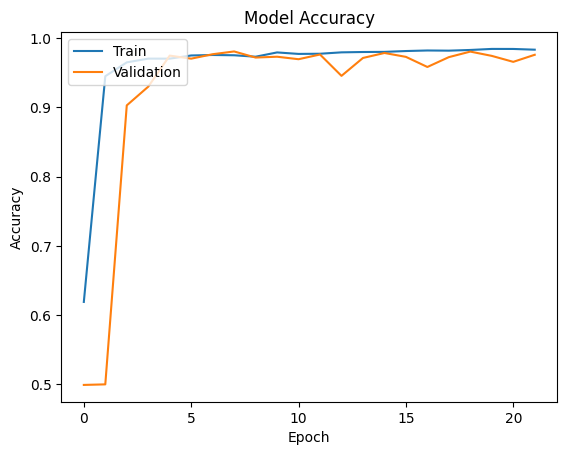

In [ ]:
plt.plot(fit_history_gb.history['accuracy'])
plt.plot(fit_history_gb.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
# Display the plot
plt.show()

###<b> Evaluating the model

In [ ]:
test_accuracy.append(model_gb.evaluate(X_test_GB, y_test_encoded, verbose = 1)[1])
print('\n', f'Test accuracy is {test_accuracy[-1]*100:.2f}%')

82/82 [==============================] - 1s 4ms/step - loss: 0.0757 - accuracy: 0.9819

 Test accuracy is 98.19%


In [ ]:
#Predictions on the test data
test_pred = model_gb.predict(X_test_GB)
test_pred = np.argmax(test_pred, axis = -1)

82/82 [==============================] - 0s 3ms/step


In [ ]:
# Calculating the probability of the predicted class
test_max_probas = np.max(model_gb.predict(X_test_GB), axis = 1)

82/82 [==============================] - 0s 3ms/step


In [ ]:
# Converting each entry to single label from one-hot encoded vector
y_test_arg = np.argmax(y_test_encoded, axis = -1)

<b>Plotting the classification report and confusion matrix

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



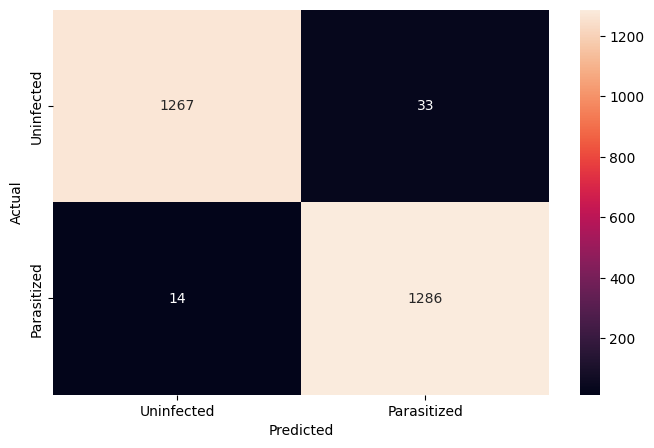

In [ ]:
# Importing required functions

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test_arg,test_pred))

# Plotting the heatmap using confusion matrix
cm = tf.math.confusion_matrix(y_test_arg,test_pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

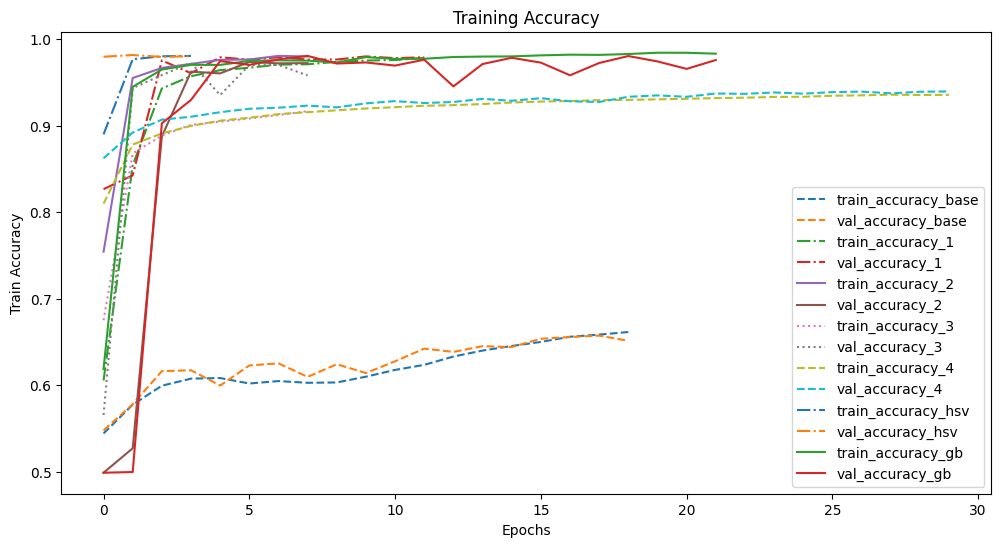

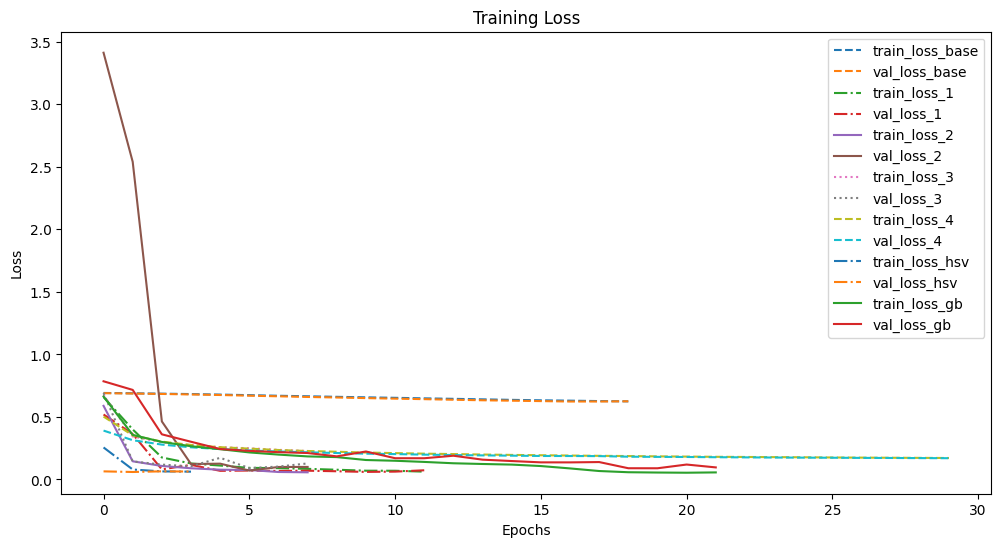

Test accuracy:  [0.6042307615280151, 0.9873076677322388, 0.9842307567596436, 0.9638461470603943, 0.9134615659713745, 0.9873076677322388, 0.9819231033325195]


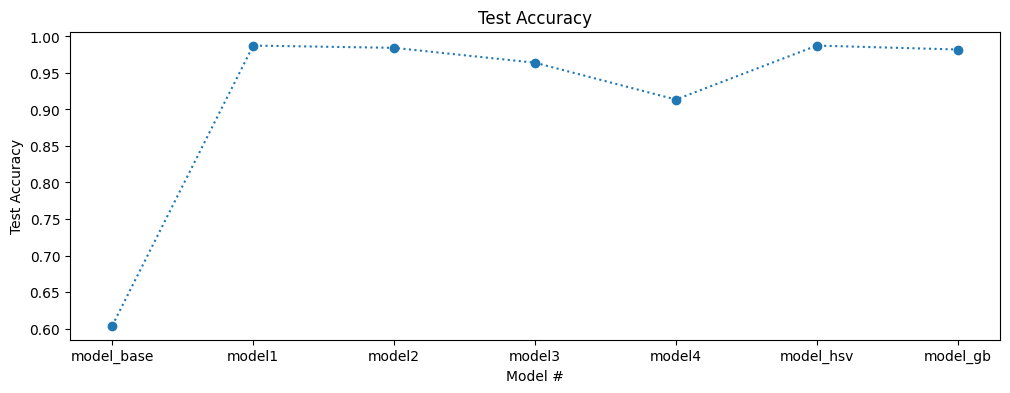

In [ ]:
# Plot train accuracy and validation accuracy
plt.figure(figsize = (12, 6))

plt.plot(fit_history_base.epoch, fit_history_base.history['accuracy'], ls = '--', label = 'train_accuracy_base')

plt.plot(fit_history_base.epoch, fit_history_base.history['val_accuracy'], ls = '--', label = 'val_accuracy_base')

plt.plot(fit_history_1.epoch, fit_history_1.history['accuracy'], ls = '-.', label = 'train_accuracy_1')

plt.plot(fit_history_1.epoch, fit_history_1.history['val_accuracy'], ls = '-.', label = 'val_accuracy_1')

plt.plot(fit_history_2.epoch, fit_history_2.history['accuracy'], ls = '-', label = 'train_accuracy_2')

plt.plot(fit_history_2.epoch, fit_history_2.history['val_accuracy'], ls = '-', label = 'val_accuracy_2')

plt.plot(fit_history_3.epoch, fit_history_3.history['accuracy'], ls = ':', label = 'train_accuracy_3')

plt.plot(fit_history_3.epoch, fit_history_3.history['val_accuracy'], ls = ':', label = 'val_accuracy_3')

plt.plot(fit_history_4.epoch, fit_history_4.history['accuracy'], ls = '--', label = 'train_accuracy_4')

plt.plot(fit_history_4.epoch, fit_history_4.history['val_accuracy'], ls = '--', label = 'val_accuracy_4')

plt.plot(fit_history_hsv.epoch, fit_history_hsv.history['accuracy'], ls = '-.', label = 'train_accuracy_hsv')

plt.plot(fit_history_hsv.epoch, fit_history_hsv.history['val_accuracy'], ls = '-.', label = 'val_accuracy_hsv')

plt.plot(fit_history_gb.epoch, fit_history_gb.history['accuracy'], ls = '-', label = 'train_accuracy_gb')

plt.plot(fit_history_gb.epoch, fit_history_gb.history['val_accuracy'], ls = '-', label = 'val_accuracy_gb')

plt.ylabel('Train Accuracy')

plt.xlabel('Epochs')

plt.title('Training Accuracy')

plt.legend()

plt.show()

#plot training and validation loss
plt.figure(figsize = (12, 6))

plt.plot(fit_history_base.epoch, fit_history_base.history['loss'], ls = '--', label = 'train_loss_base')

plt.plot(fit_history_base.epoch, fit_history_base.history['val_loss'], ls = '--', label = 'val_loss_base')

plt.plot(fit_history_1.epoch, fit_history_1.history['loss'], ls = '-.', label = 'train_loss_1')

plt.plot(fit_history_1.epoch, fit_history_1.history['val_loss'], ls = '-.', label = 'val_loss_1')

plt.plot(fit_history_2.epoch, fit_history_2.history['loss'], ls = '-', label = 'train_loss_2')

plt.plot(fit_history_2.epoch, fit_history_2.history['val_loss'], ls = '-', label = 'val_loss_2')

plt.plot(fit_history_3.epoch, fit_history_3.history['loss'], ls = ':', label = 'train_loss_3')

plt.plot(fit_history_3.epoch, fit_history_3.history['val_loss'], ls = ':', label = 'val_loss_3')

plt.plot(fit_history_4.epoch, fit_history_4.history['loss'], ls = '--', label = 'train_loss_4')

plt.plot(fit_history_4.epoch, fit_history_4.history['val_loss'], ls = '--', label = 'val_loss_4')

plt.plot(fit_history_hsv.epoch, fit_history_hsv.history['loss'], ls = '-.', label = 'train_loss_hsv')

plt.plot(fit_history_hsv.epoch, fit_history_hsv.history['val_loss'], ls = '-.', label = 'val_loss_hsv')

plt.plot(fit_history_gb.epoch, fit_history_gb.history['loss'], ls = '-', label = 'train_loss_gb')

plt.plot(fit_history_gb.epoch, fit_history_gb.history['val_loss'], ls = '-', label = 'val_loss_gb')

plt.ylabel('Loss')

plt.xlabel('Epochs')

plt.title('Training Loss')

plt.legend()

plt.show()

#plot test accuracy

print("Test accuracy: ",test_accuracy)

plt.figure(figsize = (12, 4))

plt.plot(model_name, test_accuracy, ls = ":", label = "test_accuracy", marker = "o")

plt.xlabel("Model #")

plt.ylabel("Test Accuracy")

plt.title("Test Accuracy")

plt.show()


#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
  
  *The microscope images of the red blood cells prodvide some of the below key insights :*  
  >1. *Presence of the parasite - the images show if a RBC is parasitized or uninfected.*

  >2. *Degree of infection - Changes in red blood cell morphology, such as enlarged cells, altered shape, or the presence of stippling, may indicate the impact of the malaria parasite on host cells*

  >3. *Parasite lifecycle - Different stages of the parasite lifecycle can be observed, which would be crucial in understanding the progression of the infection*

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

>*The below snapshot compares the different models and the corresponding techniques and results. Model 2 performed the best not only in terms of accuracy, but also in terms of run time, as it took the least amount of epochs (8) to complete.*

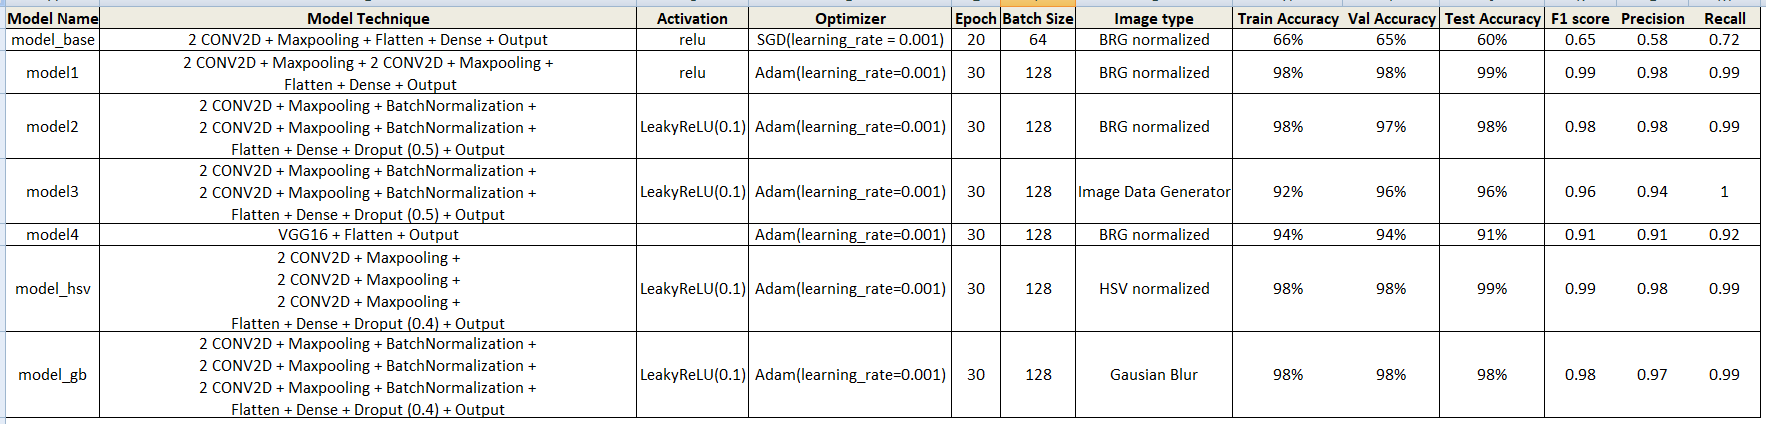
*The performance can be further improved by following some of the below techniques:*
> 1. *There is still scope for improvement in the test accuracy of the CNN model chosen here. Different architectures and optimizers can be used to build a better image classifier.*

> 2. *Transfer learning can be applied to the dataset to improve accuracy. We can choose among multiple pre-trained models available in the Keras framework, such as ResNet, DenseNet, which are popular for image classification.*

> 3. *We can try hyperparameter tuning for some of the hyperparameters like the number of convolutional blocks, the number of filters in each Conv2D layer, filter size, activation function, adding/removing dropout layers, changing the dropout ratio, etc.*

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

>*I recommend model 2 to be adopted for the below reasons:*
>>1. *Accuracy - High accuracy of this model makes it very reliable in wide variety of applications - such as R&D, diagnostics, etc.*

>>2. *Constrained resources - Since this model is not larger nor complex, it is suitable for resource constrained environments or real-time applications, which would be a big win in early detection of malaria infections especially in less developed countries.*

>>3. *Training time - This model takes less time to train, unlike a large and more complex model. If there are time constraints, then this model is well suited as it balances performance and training efficiency.*

# Executive summary
- What are the most important findings from the analysis done in Milestone - Provide the final proposed model specifications

The proposed convolution neural network model takes the blood smear images and accurately classify them into parasitized, or unifected. This solution will make malaria detection efficient, accurate and scalable.

This model has high accuracy (98% train/validation/test accuracy). Also, the model only missed 8 malaria cases, and accurately predicted the rest of the positive cases, driving a recall of 0.99. The model has generalized well to the variances in the training data. As you can see the training and validation accuracies have converged to 98%. Finally, there are 4 layers and 557K parameters to train, which the model was able to learn in 8 epochs.

The proposed model has 4 layers of convolution because with more layers, the model can learn beyond edge detection, such as detecting parts, objects  and scenes, which are important because a parasitized image can have varying degree of information, such as what species of parasite is present, what is the life cycle stage of the infection, and what changes have occurred to RBC’s shape, size and structure. LeakyRelu activation function with a negative slope of 0.1, as LeakyRulu allow some negative info to flow through the model, and so it can learn complex relationships in the data. Maxpooling allowed to capture the dominant features in the image, such as edges. Batch normalization helped the model to learn fast, while drop out of 50% helped in reducing overfitting.



# Problem and Solution Summary
- Summary of the problem - Explain the reason for the proposed solution design - How it would affect the problem/business?

Malaria is a global health concern even today. In 2019, there were 229 M cases and 400K deaths from Malaria. Kids under 5 are particularly more vulnerable and made up 67% of death. Detecting malaria is done by microscopic analysis of the blood smear image, which is a time consuming, tedious and more importantly highly dependent on the skill and expertise of the lab technician on the microscope. However, if we are able to detect the parasite early, it will significantly improve the illness and deaths and save millions of lives
So, how do we solve this.

My recommendation is to develop a CNN convolution neural network model that will take the blood smear images and accurately classify if it is infected by the Malaria parasite, aka parasitized, or a healthy and unifected. This will make malaria detection efficient, accurate and scalable


#Recommendations for implementation
- What are some key recommendations to implement the solutions? - What are the key actionables for stakeholders? What is the expected benefit and/or costs? - What are the key risks and challenges? - What further analysis needs to be done or what other associated problems need to be solved?

Implementation -

  Depending on how the model is deployed – either on cell phone or the web, the model will need to be converted to Tensoflow lite for cell phone app, or ONNX for web, followed by building an API and then integrating it in the desired environment

Risk and challenges -

  Training a CNN is extremely expensive and requires dedicated computation power in terms of GPUs. I personally had to cough out a few times on GPUs for this project
  
  Malaria parasite is ever evolving and so is the lab practices, which would impact the quality of the blood smear images. So, the model needs to be maintained and updated would be crucial for the longevity and accuracy of the model. However, getting new data can be very expensive
  
  Finally accessibility – If we can get this technology deployed where healthcare professionals are constrained, it will significantly benefit the public at large


Further analyis -

   would involve training the models with much larger dataset, that contains if not millions of images, at least 100s of thousands of images. This will not only enable the models to learn from a diverse dataset, there by improving generalization and reducing bias, but also also allow to choose a better model. Also, since CNN models are extremely difficult to interpret, I would like to be able to extract what features are being learned by the neurons, and how they influence the classification. Gaining visibility to these details will enhance trust and adoption of the technology




